#  <center>Examen OPI </center>

## A.2 Datos Abierto de la CDMX

La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las **carpetas de investigación** aportados por la **PGJ**. 

#  1. ¿Qué pruebas identificarias para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una. 

- **Existencia**. Identificar que datos estan faltantes y decidir que hacer con esos registros. Los datos faltantes pueden resultar un problema en el analisis ya que pueden desviar el resultado. En esta prueba, los meses faltantes los tomaremos de la fecha de los hecho y asi rellenamos esos campo faltantes, si es necesario. 


- **Conformidad**. Verificar que cada dato sea del tipo que debe ser. Por ejemplo, más adelante nos encargaremos que los campos de fechas sean del tipo date. También podemos revisar que los nombre de la alcalidas sean conformes a nombres validos de las alcaldias de la CDMX.


- **Duplicados**. Buscar en el conjunto de datos la presencia de duplicados y eliminar la duplicación. En este conjunto de datos, como tal no es duplicado, pero los campos mes, año, y fecha, son redundantes, podriamos quedarnos solo con fecha.


- **Rango**. Verificar que cada tipo de dato este dentro del rango que se esta analizando. 


In [3]:
import pandas as pd
from datetime import datetime 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_month(event_dates_column):
    """Esta función recibe un objeto date y devuelve el mes en español tipo string"""
    
    Actual_months = []
    months = [None,"Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio","Julio" ,"Agosto","Septiembre",
              "Octubre", "Noviembre", "Diciembre"]
    
    for event_date in event_dates_column:
        
        
        date_str = str(event_date)
        asList = date_str.split("-")
        month_number = int(asList[1])
        month = months[month_number]
        Actual_months.append(month)
    
    return Actual_months

### Leer el conjunto de datos:

In [5]:
path = "carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv"

datos =  pd.read_csv(path)
datos.head()

ao_hechos mes_hechos         fecha_hechos  \
0     2016.0       Mayo  2016-05-19 11:15:00   
1     2015.0  Diciembre  2015-12-04 10:00:00   
2     2016.0       Mayo  2016-05-19 01:30:00   
3     2016.0       Mayo  2016-05-19 12:30:00   
4     2016.0       Mayo  2016-05-06 18:40:00   

                                              delito        categoria_delito  \
0         ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA  DELITO DE BAJO IMPACTO   
1                                 DENUNCIA DE HECHOS      HECHO NO DELICTIVO   
2                                 VIOLENCIA FAMILIAR  DELITO DE BAJO IMPACTO   
3  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...  DELITO DE BAJO IMPACTO   
4                                            DESPOJO  DELITO DE BAJO IMPACTO   

                                            fiscalia agencia  \
0  INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...  STCMZV   
1  INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...   FDS-6   
2                        INVESTIGACIÓN EN IZTAPALAPA   IZP-2   
3                 INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2   
4                           INVESTIGACIÓN EN TLAHUAC   TLH-2   

  unidad_investigacion   alcaldia_hechos  \
0               UI-1CD        CUAUHTEMOC   
1             FDS-6-01  GUSTAVO A MADERO   
2               UI-1CD        IZTAPALAPA   
3               UI-1CD  GUSTAVO A MADERO   
4               UI-1SD        IZTAPALAPA   

                             colonia_hechos  ao_inicio mes_inicio  \
0                                  DOCTORES       2016       Mayo   
1                       CHALMA DE GUADALUPE       2016       Mayo   
2                       LOS REYES CULHUACÁN       2016       Mayo   
3              GERTRUDIS SANCHEZ 3A SECCION       2016       Mayo   
4  AREA FEDERAL PANTEON SAN LORENZO TEZONCO       2016       Mayo   

          fecha_inicio                                       calle_hechos  \
0  2016-05-19 13:09:32  INTERIOR VAGON DEL METRO ESTACION NIÑOS HÉROES...   
1  2016-05-19 13:09:56                      QUERETARO NO.86 MZ 520  LT 13   
2  2016-05-19 13:21:33                              CUAUHTEMOC MZ.15 LT.8   
3  2016-05-19 13:24:45                                     CALLE NORTE 84   
4  2016-05-19 13:25:05                                        PROVIDENCIA   

         calle_hechos2   longitud    latitud                  geopoint  
0         NIÑOS HEROES -99.150633  19.419482  19.4194819998,-99.150633  
1                  NaN -99.153112  19.549869  19.5498689998,-99.153112  
2                SILOS -99.110467  19.347049  19.3470489998,-99.110467  
3  ESQUINA ORIENTE 107 -99.101675  19.462630  19.4626299998,-99.101675  
4               TESORO -99.056319  19.308832  19.3088319998,-99.056319

### Veamos que elementos nulos tenemos:

In [6]:
print("Dimensiones del conjunto de datos: ", datos.shape)

null_columns = datos.columns[datos.isnull().any()]
print("Cantidad de datos nulos por columna: ")

#Imprimir las columnas en las que Tm es null:
#print(df[df["Tm"].isnull()][null_columns])
datos[null_columns].isnull().sum()

Dimensiones del conjunto de datos:  (931007, 18)
Cantidad de datos nulos por columna: 


ao_hechos                  389
mes_hechos                 389
fecha_hechos               313
unidad_investigacion       225
alcaldia_hechos           3086
colonia_hechos           37057
calle_hechos              2506
calle_hechos2           558332
longitud                 36285
latitud                  36285
geopoint                 36285
dtype: int64

Para analisar la tendencia necesitaremos el campo fecha_hechos y mes_hechos, por lo que eliminaremos las filas en las que el campo **fecha_hechos** es null.

In [7]:
#Eliminar las columnas en las que Fecha_hechos es null
datos_clean = datos[datos['fecha_hechos'].isnull() == False]
#Eliminar las columnas en las que Fecha tiene un formato no valido:
datos_clean = datos_clean[datos_clean['fecha_hechos'] != 'NA NA']
datos_clean = datos_clean[datos_clean['fecha_hechos'] != 'NA 00:00:00']

#Utilizar el campo fecha_hechos para obtener los mes_hechos faltantes:
datos_clean["mes_hechos"] = get_month(datos_clean['fecha_hechos'])
## Vamos aseguarnos que los elementos de ao_hechos sean de tipo int:
datos_clean['ao_hechos'] = datos_clean['ao_hechos'].apply(pd.to_numeric)

print("Dimensiones del conjunto de datos: ", datos_clean.shape)
null_columns = datos_clean.columns[datos_clean.isnull().any()]
datos_clean[null_columns].isnull().sum()

Dimensiones del conjunto de datos:  (930618, 18)


unidad_investigacion       224
alcaldia_hechos           3077
colonia_hechos           36979
calle_hechos              2461
calle_hechos2           558095
longitud                 36207
latitud                  36207
geopoint                 36207
dtype: int64

In [8]:
datos_clean['fecha_hechos'] = pd.to_datetime(datos_clean['fecha_hechos'])

#  2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?


In [9]:
def get_range(df,date_column):
    """Esta función devuelve la Fecha mas antigua y la Fecha mas actual encontrada en 
    la columna date_column del dataframe df"""
    
    dates = df[date_column].values
    dates_type = []
    for date_ in dates:
        
        try:
            
            date_type = pd.to_datetime(date_)
            dates_type.append(date_type)
        #Si el objeto no puede convertise a date:
        except:
            continue
    
    
    return min(dates_type), max(dates_type)
    
older_date, younger_date = get_range(datos_clean, 'fecha_hechos')    

In [10]:
print("Cantidad de delitos Registrados en la tabla: ", datos_clean.shape[0])
crime_unique_label_names = datos_clean['delito'].unique()
crime_unique_labels = len(datos_clean['delito'].unique())
crime_label = len(datos_clean['categoria_delito'].unique())

print("Cantidad de delitos diferentes en la tabla: ", crime_unique_labels)
print("Los delitos estan Categorizados en una de las {} categorias de delitos.".format(crime_label))
print("Las fechas de los crimenes van desde {} hasta {}".format(older_date , younger_date))


Cantidad de delitos Registrados en la tabla:  930618
Cantidad de delitos diferentes en la tabla:  278
Los delitos estan Categorizados en una de las 16 categorias de delitos.
Las fechas de los crimenes van desde 1906-06-02 19:00:00 hasta 2019-12-31 22:40:00


In [11]:
years_ = datos_clean.groupby(['ao_hechos','mes_hechos'])['ao_hechos'].count()
print(years_)

print(datos_clean['mes_hechos'].unique())


ao_hechos  mes_hechos
1906.0     Junio             1
1915.0     Enero             1
           Septiembre        1
1930.0     Febrero           1
1942.0     Octubre           1
1954.0     Mayo              1
1955.0     Diciembre         1
           Febrero           1
1956.0     Enero             1
           Mayo              1
1957.0     Enero             1
1958.0     Octubre           1
1960.0     Mayo              1
1962.0     Diciembre         1
1963.0     Octubre           2
1964.0     Febrero           1
           Noviembre         1
1965.0     Enero             1
1966.0     Marzo             1
           Septiembre        1
1968.0     Enero             1
           Septiembre        1
1969.0     Agosto            1
           Enero             1
           Febrero           1
           Julio             2
           Septiembre        1
1970.0     Junio             2
1971.0     Diciembre         1
           Noviembre         1
                         ...  
2017.0     Junio 

In [12]:
crime_unique = datos_clean.groupby(['categoria_delito','delito'])['delito'].count()
print(crime_unique)

categoria_delito                                      delito                                                                       
DELITO DE BAJO IMPACTO                                ABANDONO DE PERSONA                                                               3447
                                                      ABORTO                                                                             445
                                                      ABUSO DE AUTORIDAD                                                                6558
                                                      ABUSO DE CONFIANZA                                                               15079
                                                      ABUSO SEXUAL                                                                     10387
                                                      ACOSO SEXUAL                                                                      1801
                      

# 3. ¿Cómo se distribuye el número de delitos en la CDMX? 

#### Veamos la cantidad de delitos cometidos por cada categoria de delito y observemos en que cateogoria se encuentran la mayoria de los delitos cometidos 

In [14]:
crime_unique = datos_clean.groupby(['categoria_delito'])['delito'].count().sort_values(ascending=False)
crime_unique = pd.DataFrame(crime_unique)
crime_unique.rename(columns= {'delito':'Cantidad'}, inplace=True)
crime_unique = crime_unique.reset_index(drop=False)
crime_unique


categoria_delito  Cantidad
0                              DELITO DE BAJO IMPACTO    712435
1   ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...     55095
2                ROBO DE VEHÍCULO CON Y SIN VIOLENCIA     51387
3                                  HECHO NO DELICTIVO     50856
4                        ROBO A NEGOCIO CON VIOLENCIA     15521
5   ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...     10036
6               ROBO A REPARTIDOR CON Y SIN VIOLENCIA      9314
7       LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO      7574
8                                    HOMICIDIO DOLOSO      5351
9                                           VIOLACIÓN      3946
10  ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...      3459
11               ROBO A CASA HABITACIÓN CON VIOLENCIA      2235
12  ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...      1779
13      ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA       951
14           ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA       530
15                                          SECUESTRO       149

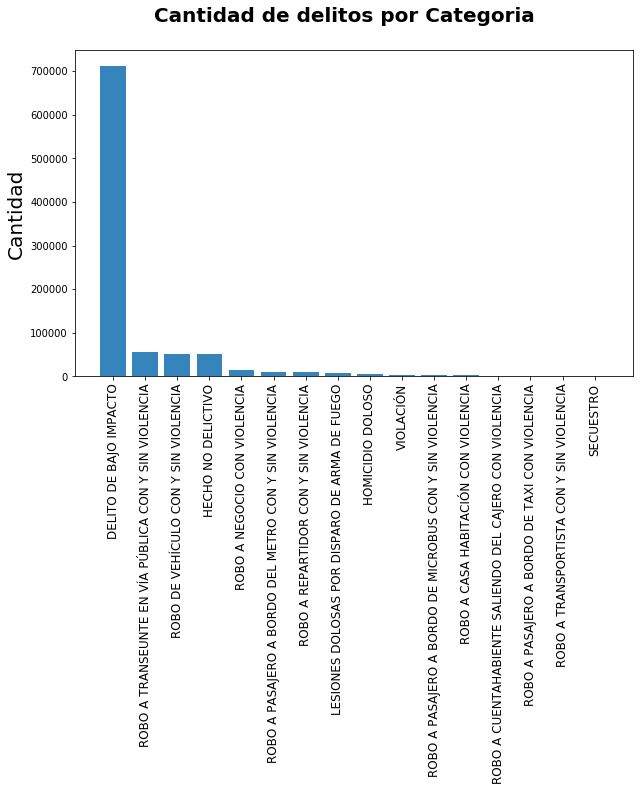

In [15]:
plt.figure(figsize=(10,6))
plt.suptitle('Cantidad de delitos por Categoria', fontsize=20, fontweight='bold')
plt.bar(crime_unique['categoria_delito'], crime_unique['Cantidad'] , align='center', alpha=0.9)
plt.xticks(crime_unique['categoria_delito'], crime_unique['categoria_delito'], rotation=90, fontsize=12)
plt.ylabel('Cantidad', fontsize=20)
#plt.xlabel('Categoria', fontsize=20)
#plt.title('Categoria', fontsize= 20)

plt.show()

En la gráfica podemos observar que la categoria en la que más delitos se registran es en la categoria **Delito de bajo Impacto**, seguida por **Robo a Trausente en vía publica con y sin violencia**

### ¿Cuáles son los 5 delitos más frecuentes?

In [16]:
crime_frec = datos_clean.groupby(['delito'])['delito'].count().sort_values(ascending=False)
crime_frec = pd.DataFrame(crime_frec)
crime_frec.rename(columns= {'delito':'Cantidad'}, inplace=True)
crime_frec = crime_frec.reset_index(drop=False)
print("En la siguiente tabla se muestran los delitos con mas registros:")
crime_frec.head(5)

En la siguiente tabla se muestran los delitos con mas registros:


delito  Cantidad
0                              VIOLENCIA FAMILIAR     82742
1                    ROBO A NEGOCIO SIN VIOLENCIA     60269
2                                 ROBO DE OBJETOS     58414
3                                          FRAUDE     53524
4  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     48858

##   4.  Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias) 

Primero tomemos los datos del año 2019:

In [17]:
df_2019 = datos_clean[datos_clean['ao_hechos'] == 2019]
print("Ahora trabajaremos con un dataframe de la forma: " ,df_2019.shape)
df_2019.head(5)

Ahora trabajaremos con un dataframe de la forma:  (231175, 18)


ao_hechos mes_hechos        fecha_hechos  \
278669     2019.0    Octubre 2019-10-22 14:30:00   
278671     2019.0    Octubre 2019-10-23 13:30:00   
278673     2019.0    Octubre 2019-10-19 19:30:00   
278675     2019.0    Octubre 2019-10-22 15:00:00   
278677     2019.0    Octubre 2019-10-23 14:00:00   

                                                   delito  \
278669                                             FRAUDE   
278671         ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA   
278673  FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...   
278675                                           AMENAZAS   
278677                                       ABUSO SEXUAL   

              categoria_delito  \
278669  DELITO DE BAJO IMPACTO   
278671  DELITO DE BAJO IMPACTO   
278673  DELITO DE BAJO IMPACTO   
278675  DELITO DE BAJO IMPACTO   
278677  DELITO DE BAJO IMPACTO   

                                                 fiscalia agencia  \
278669                        INVESTIGACIÓN EN CUAUHTEMOC   CUH-8   
278671                     INVESTIGACIÓN EN BENITO JUÁREZ    BJ-1   
278673                        INVESTIGACIÓN EN CUAUHTEMOC   CUH-7   
278675                        INVESTIGACIÓN EN CUAUHTEMOC   CUH-8   
278677  INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...   FDS-6   

       unidad_investigacion alcaldia_hechos     colonia_hechos  ao_inicio  \
278669               UI-2SD      CUAUHTEMOC           ROMA SUR       2019   
278671               UI-1SD   BENITO JUAREZ  SAN SIMÓN TICUMAC       2019   
278673               UI-2SD      CUAUHTEMOC         ROMA NORTE       2019   
278675               UI-2SD      CUAUHTEMOC           ROMA SUR       2019   
278677             FDS-6-02      CUAUHTEMOC                NaN       2019   

       mes_inicio         fecha_inicio     calle_hechos  \
278669    Octubre  2019-10-23 20:26:09    AV CUAUHTEMOC   
278671    Octubre  2019-10-23 20:29:36  AVENIDA TLALPAN   
278673    Octubre  2019-10-23 20:32:53   ALVARO OBREGON   
278675    Octubre  2019-10-23 20:35:48        MONTERREY   
278677    Octubre  2019-10-23 20:38:26     SE DESCONOCE   

                    calle_hechos2   longitud    latitud  \
278669                     TOLUCA -99.155507  19.404269   
278671  AVENIDA ANTONIO RODRIGUEZ -99.141005  19.375690   
278673                        NaN -99.155593  19.419189   
278675                TEHUANTEPEC -99.161115  19.405681   
278677                        NaN        NaN        NaN   

                            geopoint  
278669  19.4042694874,-99.1555074584  
278671  19.3756898376,-99.1410050902  
278673  19.4191888817,-99.1555930437  
278675  19.4056809042,-99.1611151002  
278677                           NaN

#### Vamos asegurarnos de que los elementos en el campo "fecha_hechos" sean de tipo date:

In [18]:
df_2019['fecha_hechos'] = pd.to_datetime(df_2019['fecha_hechos'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###  En la siguiente tabla, podemos ver que hay delitos de los que se tienen pocos registros o ninguno, no podemos indentificar una alza o baja en esos casos, por lo que se descartaran en el analisis. El valor minimo de datos puede personalizarse, por ahora analizaremos los delitos que tengan mas de 365 registros.

In [19]:
LowRecords = df_2019.groupby(['delito'])['delito'].count().sort_values(ascending=True)
LowRecords

delito
CONTAGIO VENERERO                                                           1
ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA                     1
CONTRA LA LEY GENERAL DE EXPLOSIVOS                                         1
EXPOSICION DE MENORES                                                       1
ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA                     1
ENTREGA ILEGITIMA DE UN MENOR                                               1
INTIMIDACION (EVITAR DENUNCIA, APORTE INFORMACIÓN O PRUEBAS)                1
UTILIZACION INDEBIDA DE LA VIA PUBLICA                                      1
DIFAMACION                                                                  1
VIOLACION TUMULTUARIA EQUIPARADA                                            1
DENUNCIA DE HECHOS POR ROBO DE CELULAR                                      1
VIOLACION DE LA INTIMIDAD                                                   1
ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA                  

##### Vamos analizar la tendencia del delito **Violencia Familiar**


In [20]:
def quitHour(datetime_):
    """Esta función elimina la parte de la hora en la fecha,
    es util para modificar la granuladidad."""
    
    
    return datetime_.date()

In [169]:
def quitDay(datetime_):
    """Esta función elimina la parte del día y hora en la fecha,
    es util para modificar la granuladidad. Devuelve string"""
    
        
    return datetime_.strftime("%Y-%m")

In [170]:
def quitDay2(datetime_):
    """Esta función elimina la parte del día y hora en la fecha,
    es util para modificar la granuladidad.Devuelve date"""
    mydate = datetime_.strftime("%Y-%m") + "-01"
    mydate = mydate.split("-")
    mydate = datetime(int(mydate[0]), int(mydate[1]), int(mydate[2]))
        
    return mydate.date()


In [251]:
def trendbyMS(df):
    """Esta función calcula la linea de ajuste mediante el método de minimos cuadrados """
    
    #Recibimos un dataframe donde cada fila es |MES||Cantidad de delitos en ese mes|
    mytt = df
    mytt = mytt.reset_index(drop=False)
    mytt.drop(['fecha_hechos'], axis = 1)
    
    N = mytt.shape
    N = N[0]
    sumY = mytt['Cantidad'].sum()
    sumX = mytt['index'].sum()
    sumXY = (mytt['Cantidad']*mytt['index']).sum()
    sumX2 = (mytt['index']*mytt['index']).sum()
    sumY2 = (mytt['Cantidad']*mytt['Cantidad']).sum()
    
    a_0 = (sumY*sumX2 - sumX*sumXY)/ (N*sumX2 - sumX*sumX)
    a_1 = (N*sumXY - sumX*sumY) / (N*sumX2 - sumX*sumX)
    
    return a_0, a_1

In [252]:
def trendView(df_,crime_name):
    """Esta función devuelve una grafica en la que se puede observar la tendecia de los datos.
    df_ [pandas.DataFrame] es el dataframe de donde se obtendran los datos, 
    crime_name [str] es el nombre del crime del que se desea observar la tendencia"""
    
    #Crear un nuevo df que solo contiene las columnas con crime_name:
    df_crime = df_[df_["delito"] == crime_name]
    
    #Quitamos la hora y dia, para que la granularidad sea de un mes:
    df_crime["fecha_hechos"] = df_crime["fecha_hechos"].apply(quitDay)
    
    #Vamos agrupar todos los elementos que tengan la misma fecha y sumarlos
    #Obtenemos un dataframe donde cada fila es |MES||Cantidad de delitos en ese mes|
    df_crime = df_crime.groupby('fecha_hechos')['delito'].count()
    df_crime = pd.DataFrame(df_crime)
    df_crime = df_crime.reset_index(drop=False) 
    df_crime.rename(columns= {'delito':'Cantidad'}, inplace=True)
    #aqui calcular trend con MS
    
    a_0, a_1 = trendbyMS(df_crime)
    min_records = 365
    records = df_crime['Cantidad'].sum()
    
    if records < min_records:
        #print("El delito no cuenta con el minimo de registros. ",records)
        return None
    
    a_0, a_1 = trendbyMS(df_crime)
    print(a_0, a_1)
    min_records = 365
    #Definir el encabezado de la gráfica:
    suptitle_ = 'DELITOS DE ' + crime_name + " REGISTRADOS EN EL AÑO 2019"
    plt.figure(figsize=(20,6))
    plt.suptitle(suptitle_, fontsize=15, fontweight='bold')
    #X seran las fechas, Y la cantidad de delitos:
    plt.plot_date(df_crime['fecha_hechos'], df_crime['Cantidad'], linestyle = 'solid', linewidth=4, markersize = 10)
    
    #plt.xticks(df_crime['fecha_hechos'], df_crime['fecha_hechos'], rotation=90, fontsize=12)
    plt.ylabel('Cantidad', fontsize=20)
    plt.xlabel('Meses', fontsize=20)
    plt.grid()
    
    #plt.show()
    
    return plt.figure
    

1993.1538461538462 9.153846153846153


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

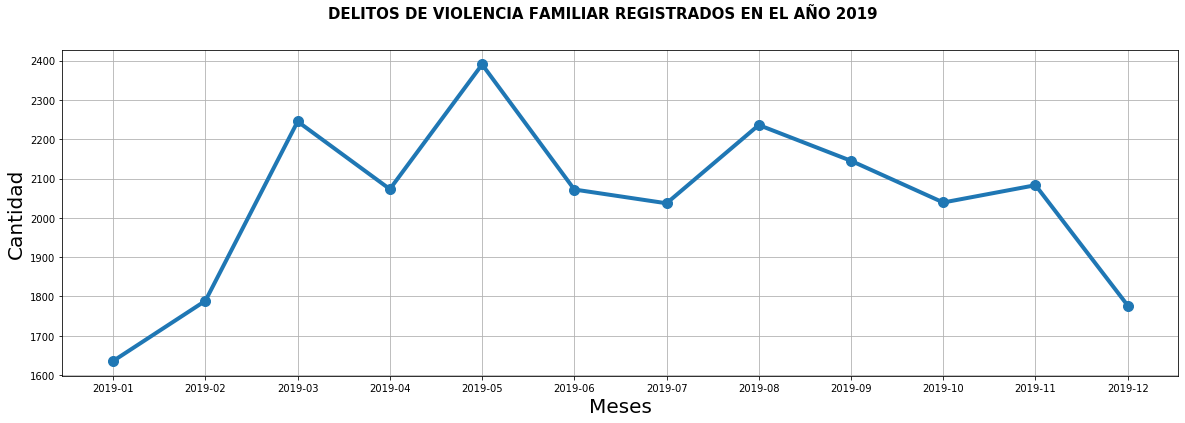

In [253]:
trendView(df_2019, 'VIOLENCIA FAMILIAR')

### En base a los datos mostrados en la gráfica podemos decir que el delito de Violencia Familiar tiene un tendencia a la baja durante los ultimos meses del año 2019 

## Ahora veamos la gráficas del resto de los delitos que pasan el umbral de 365 registro en el año: 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


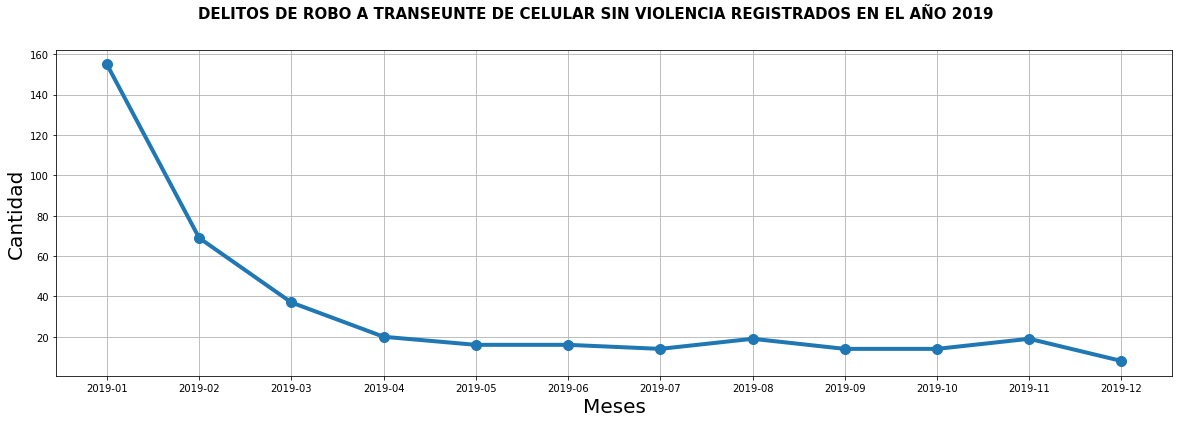

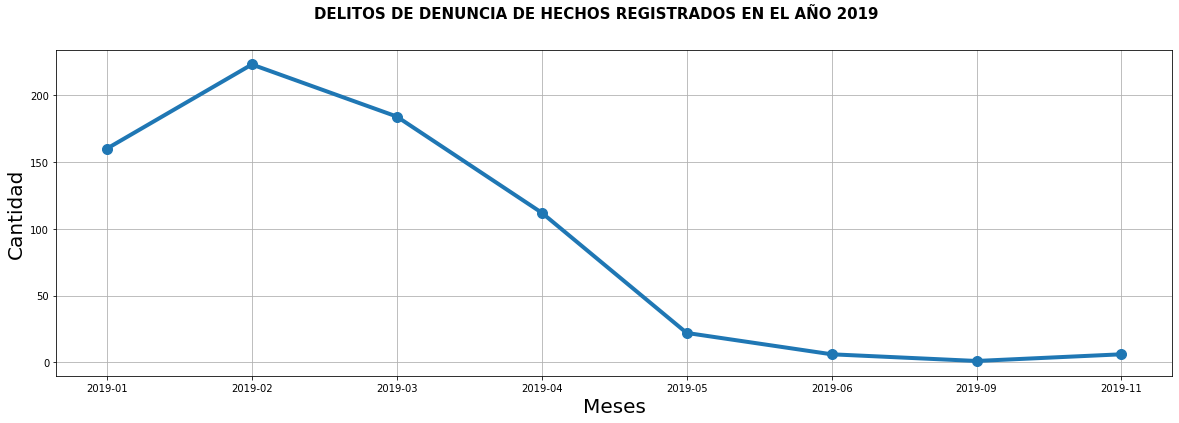

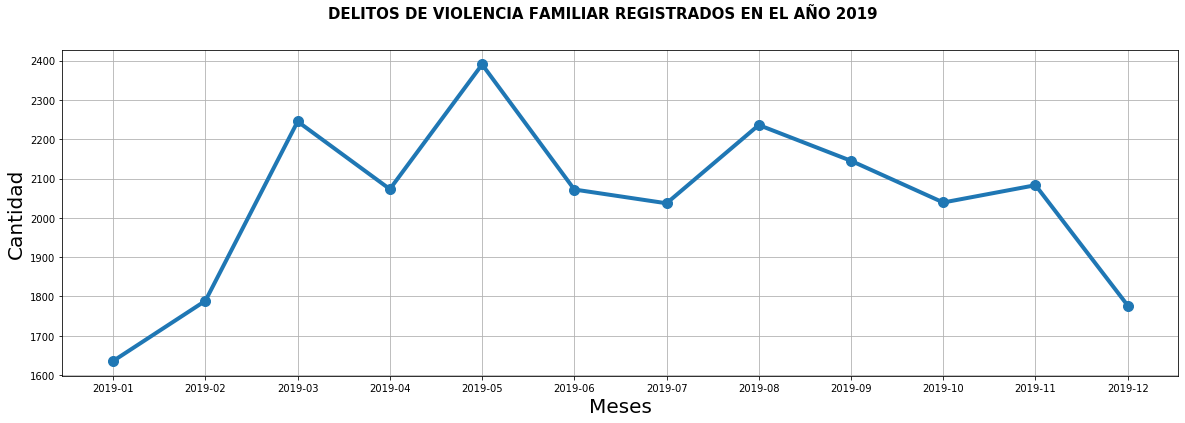

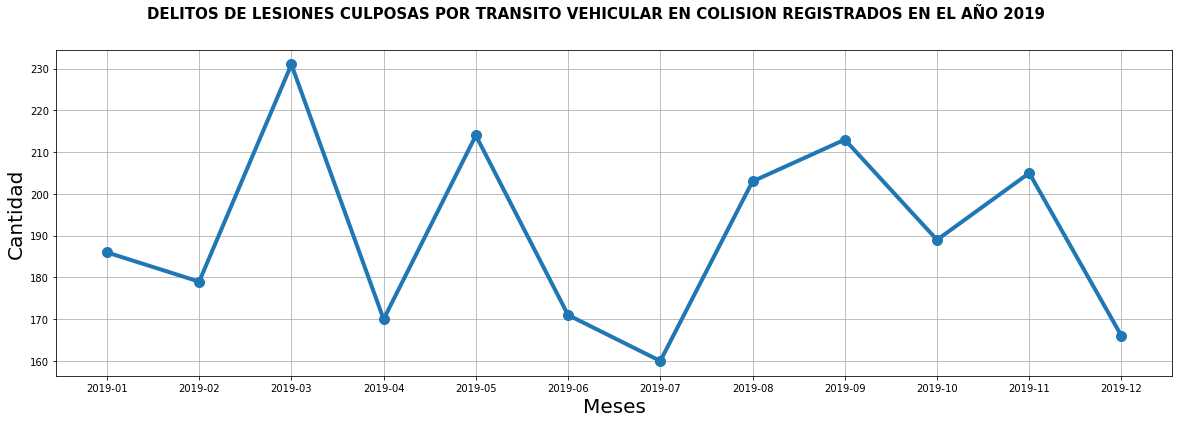

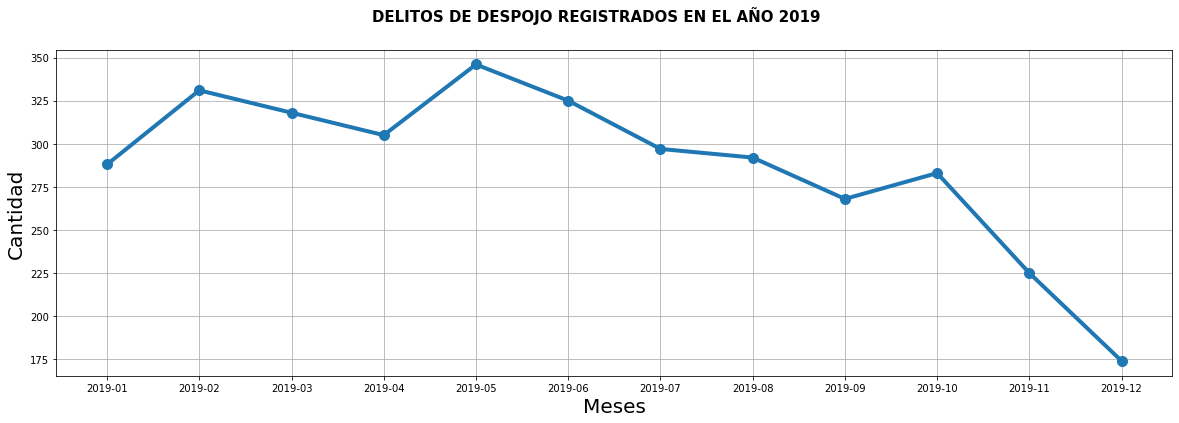

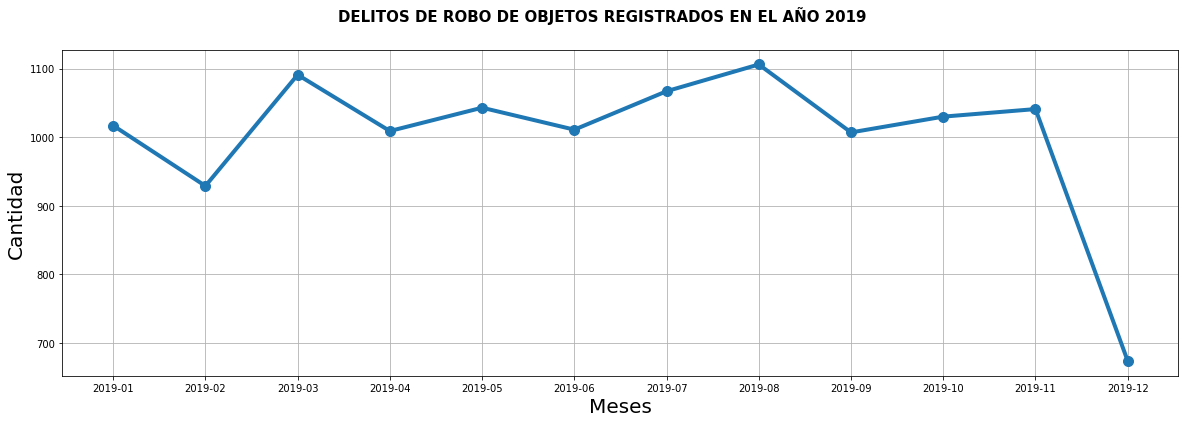

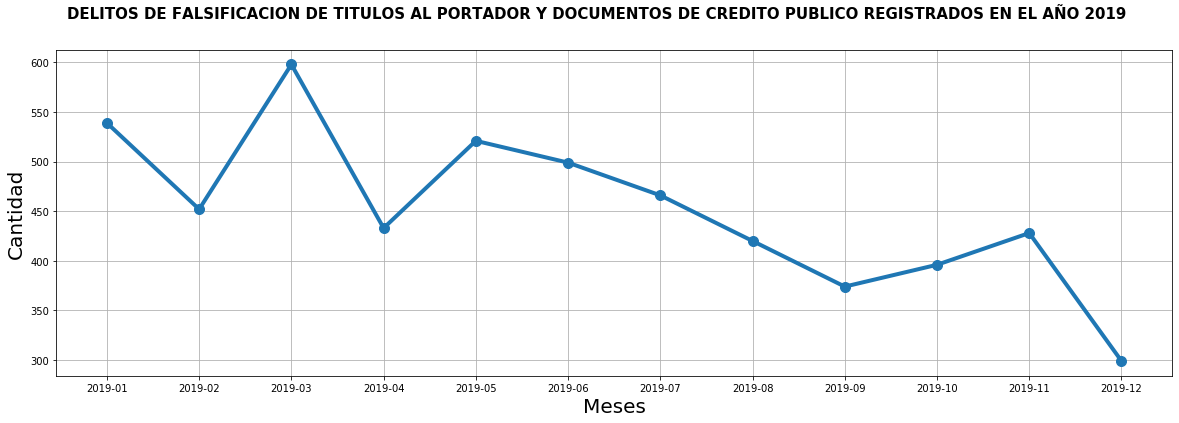

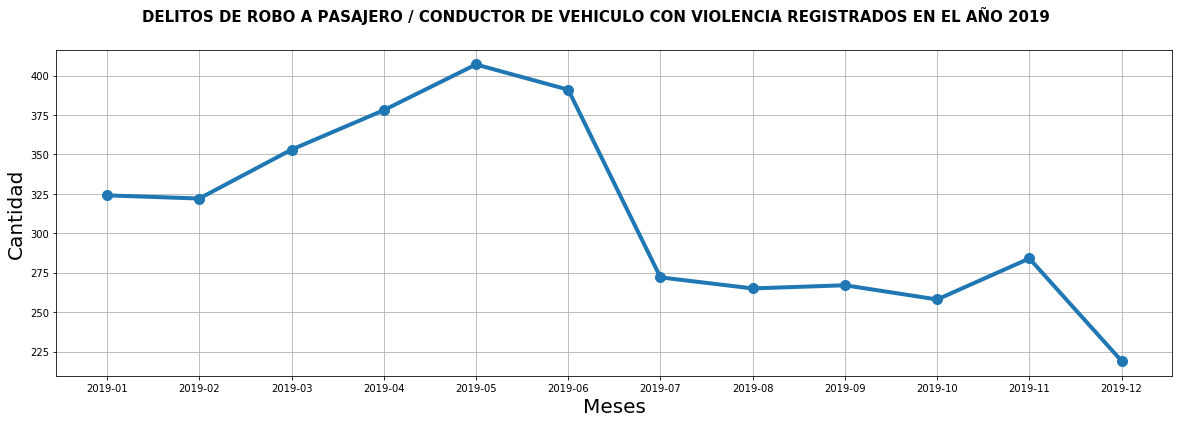

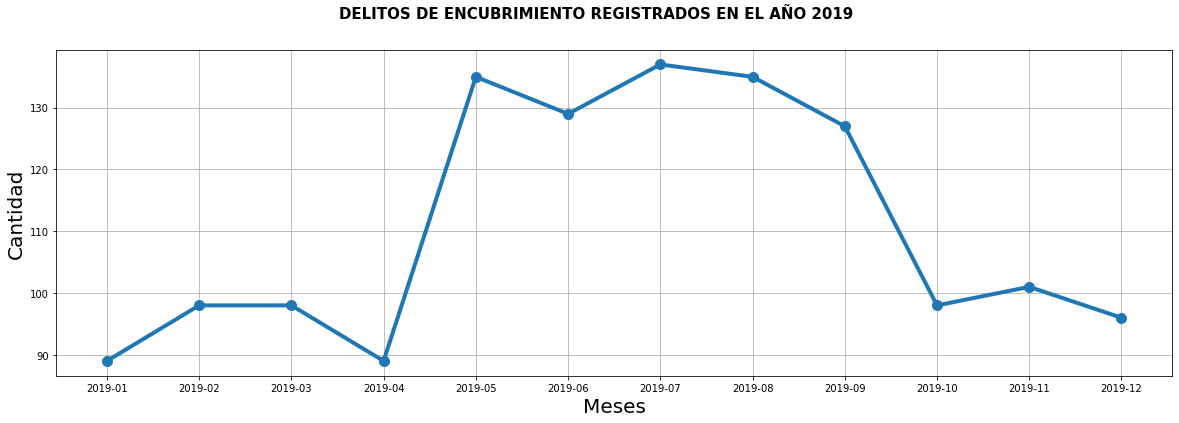

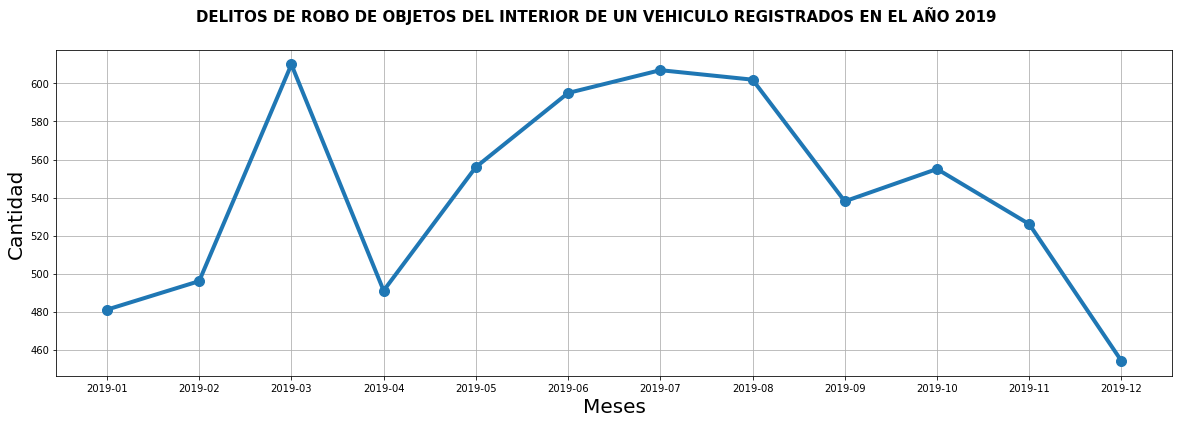

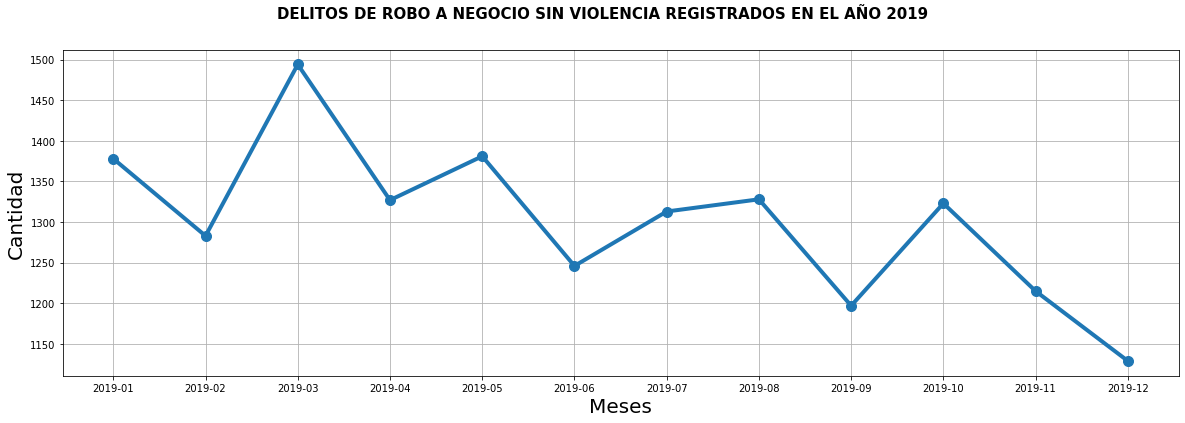

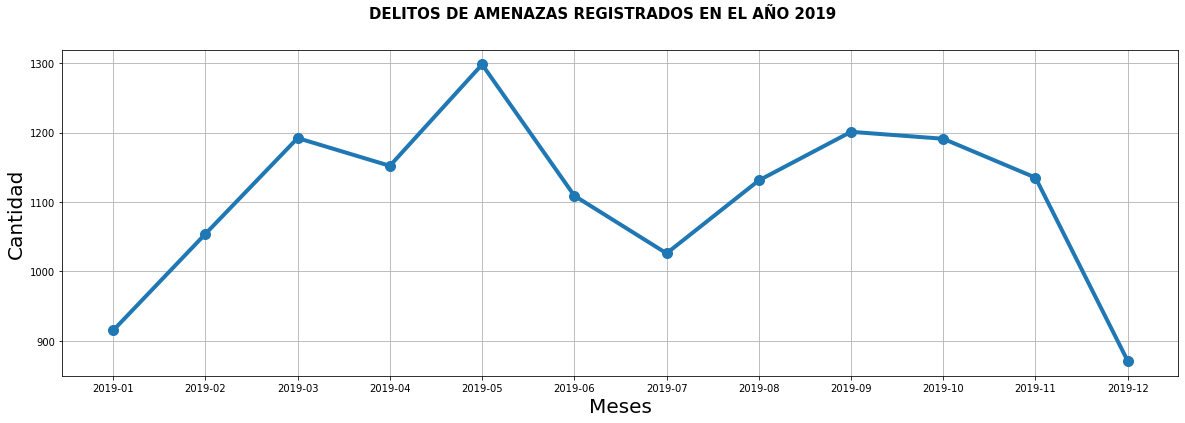

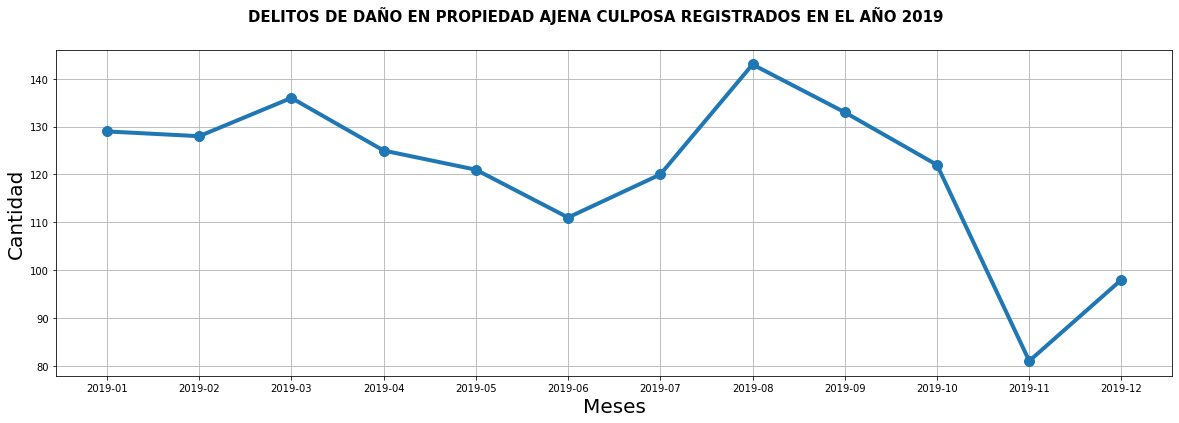

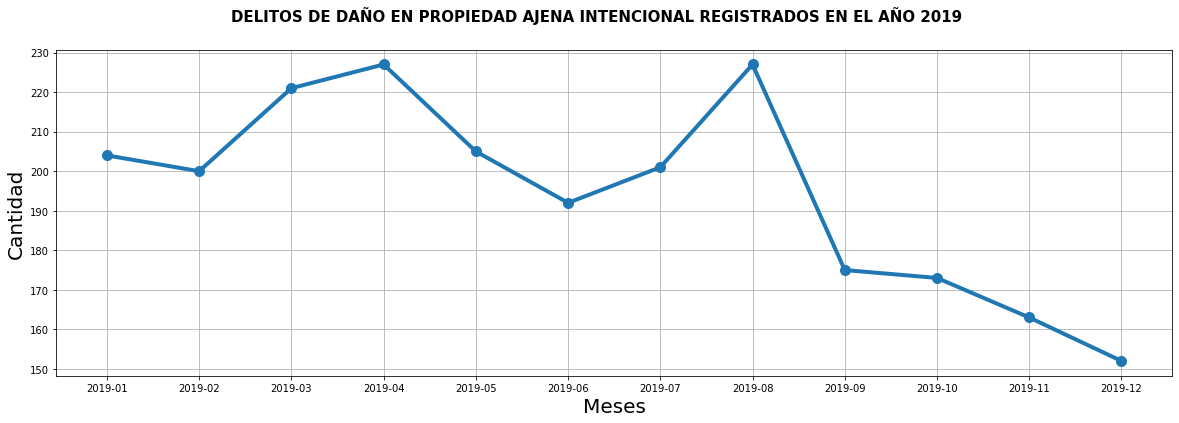

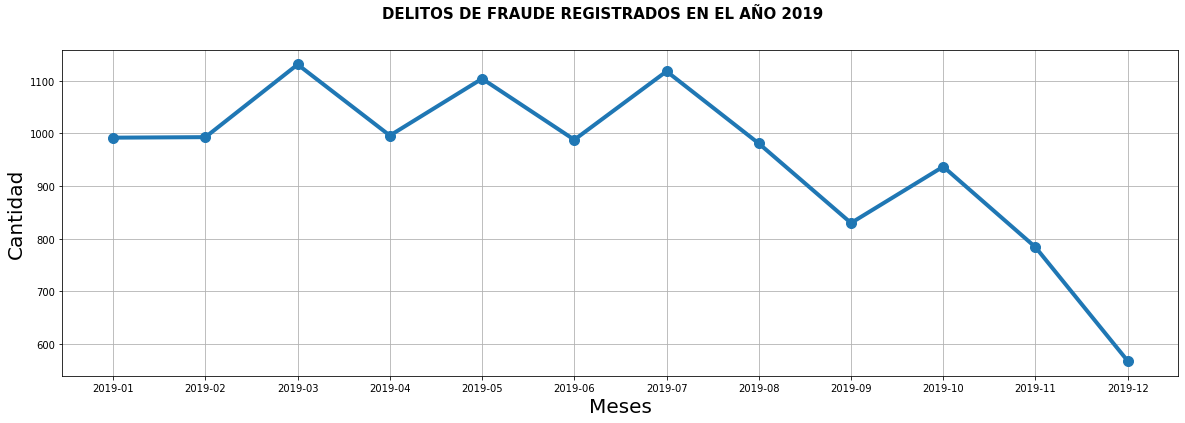

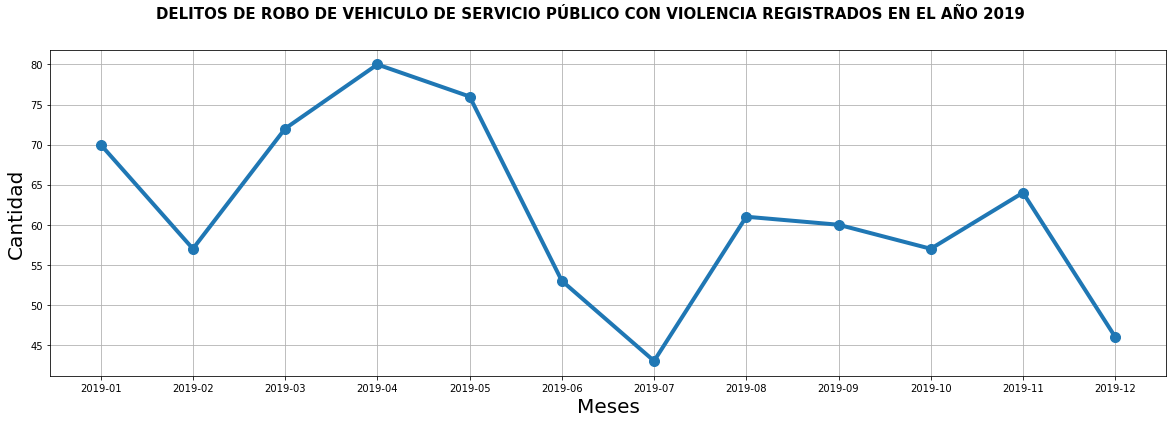

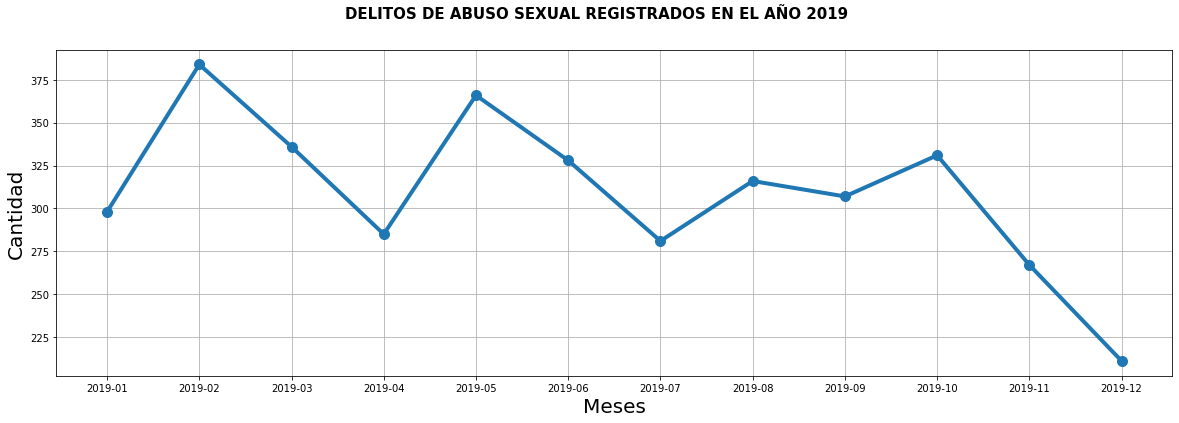

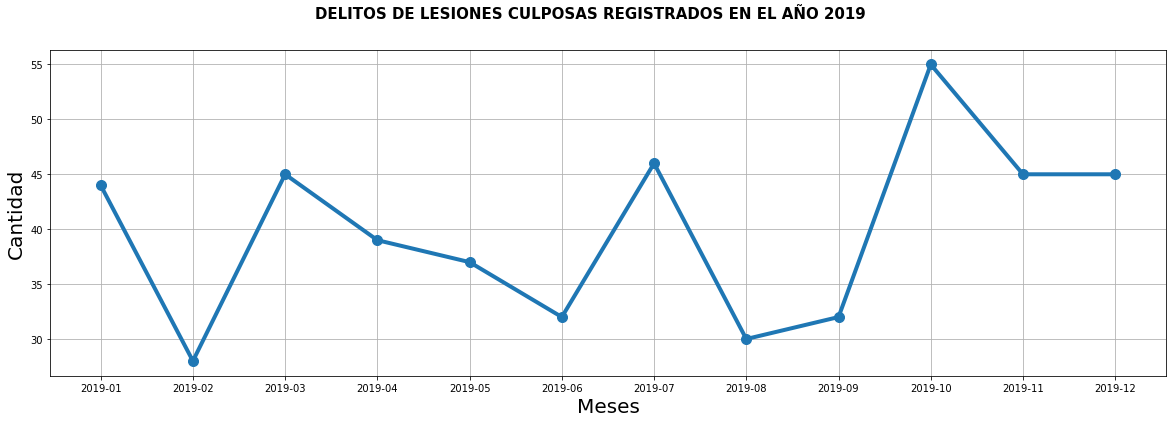

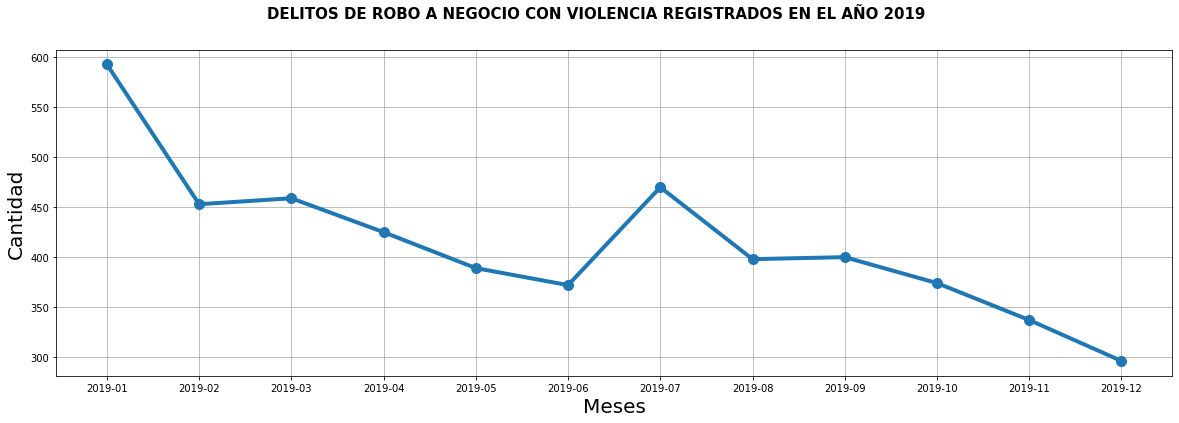

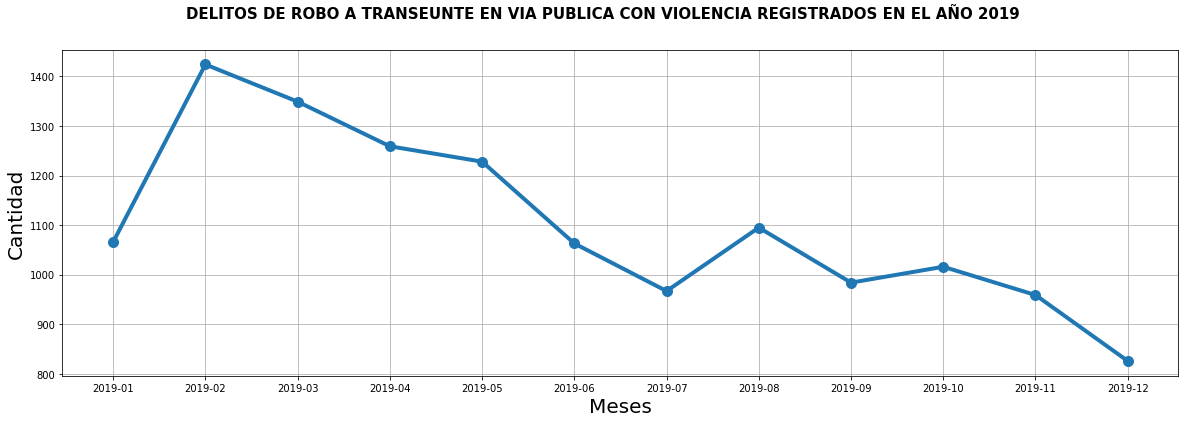

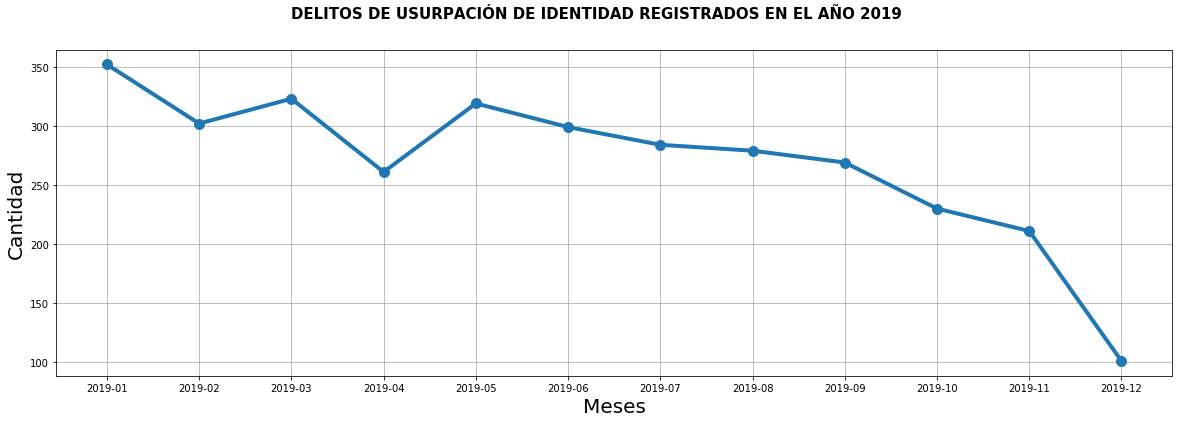

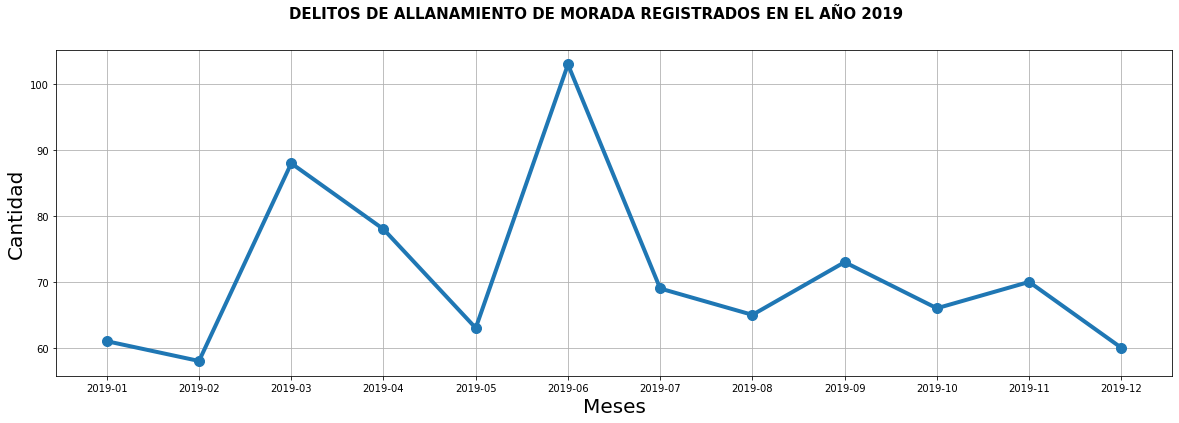

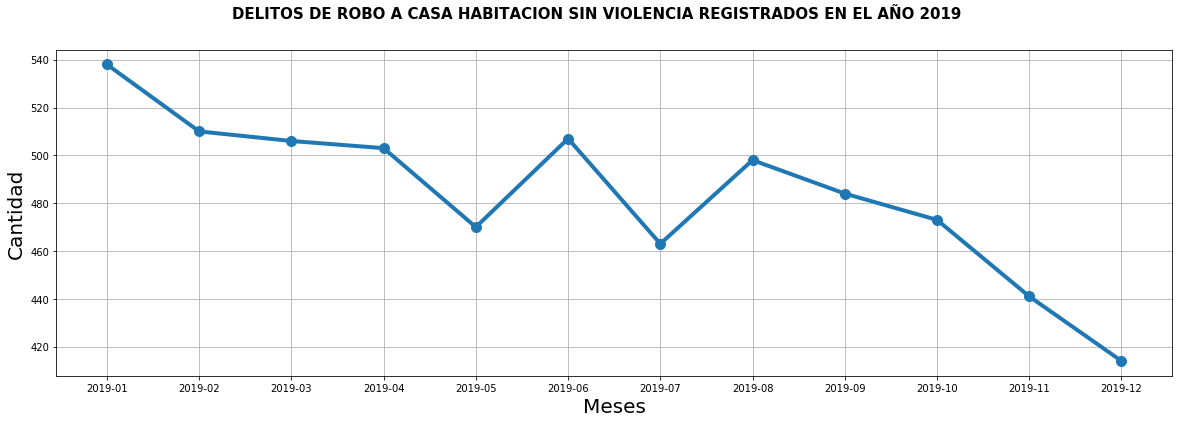

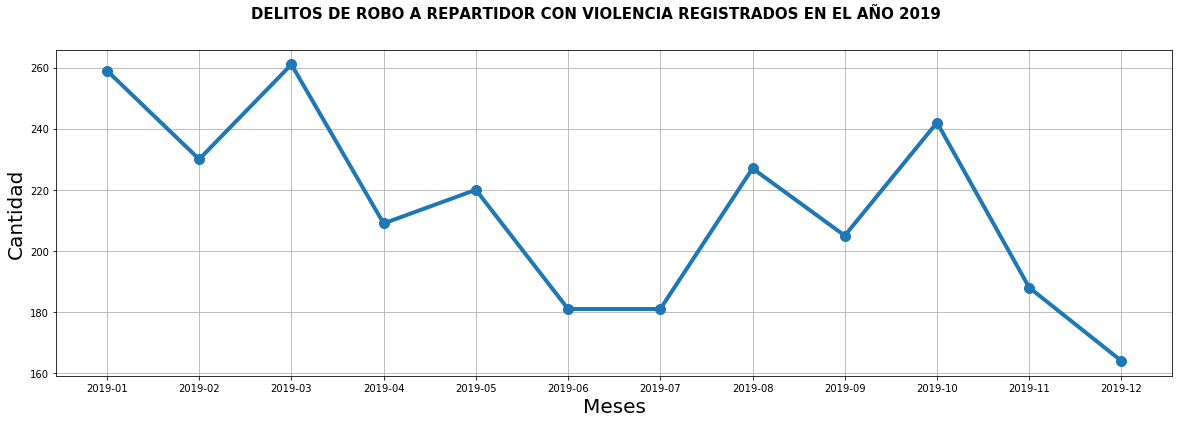

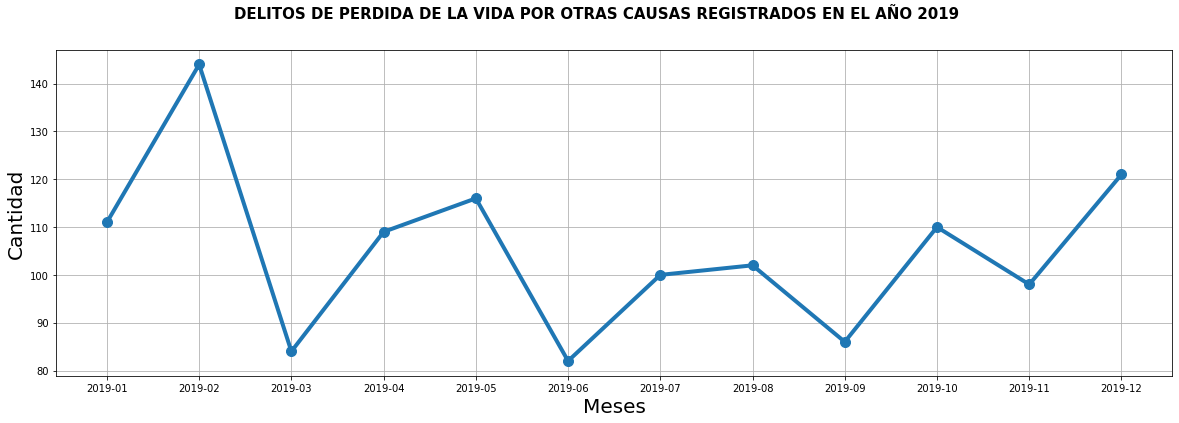

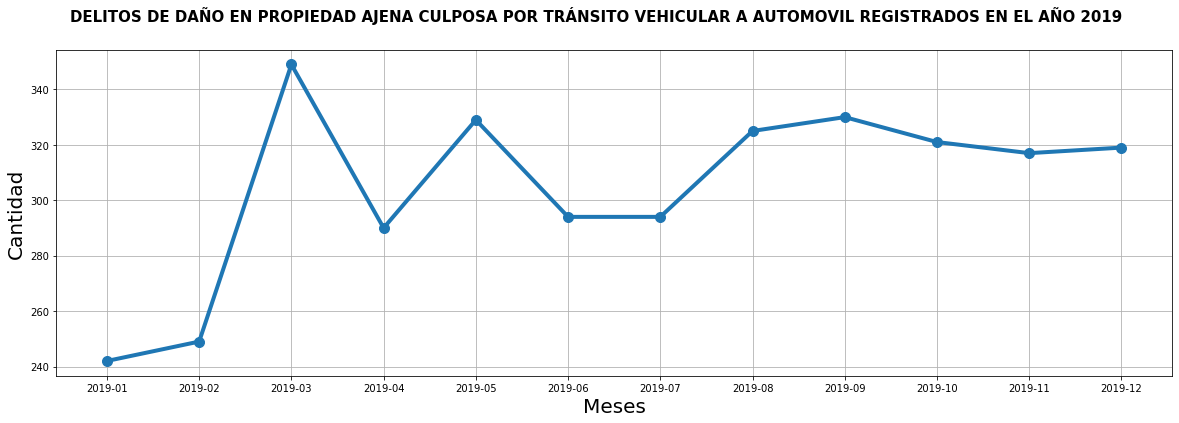

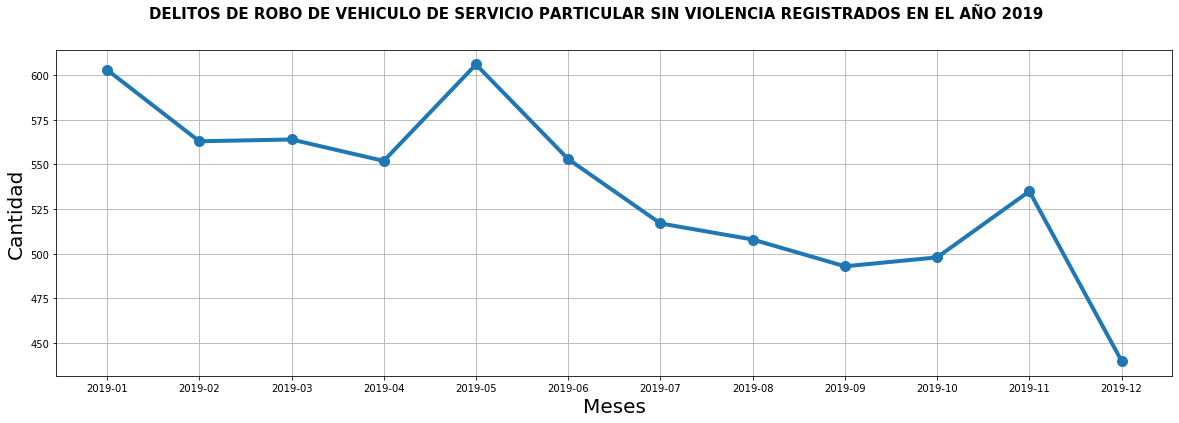

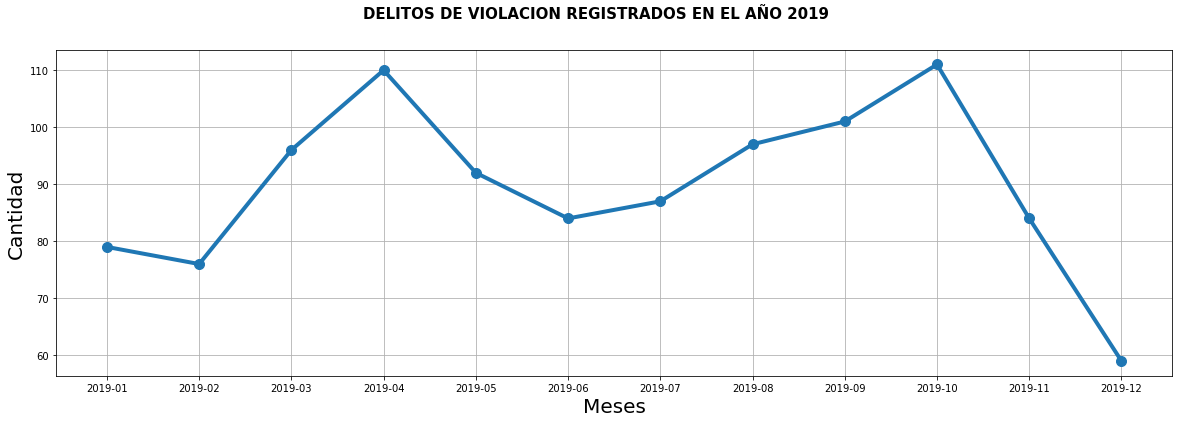

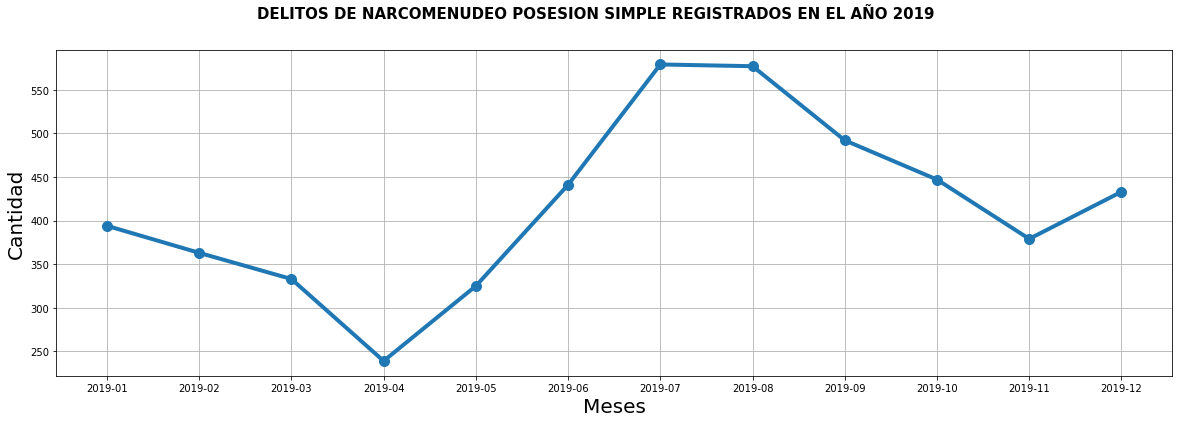

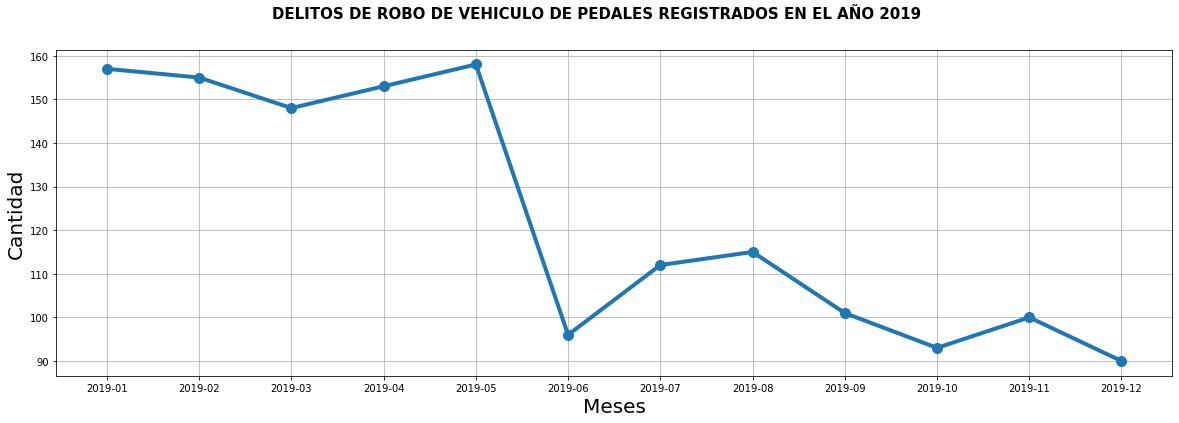

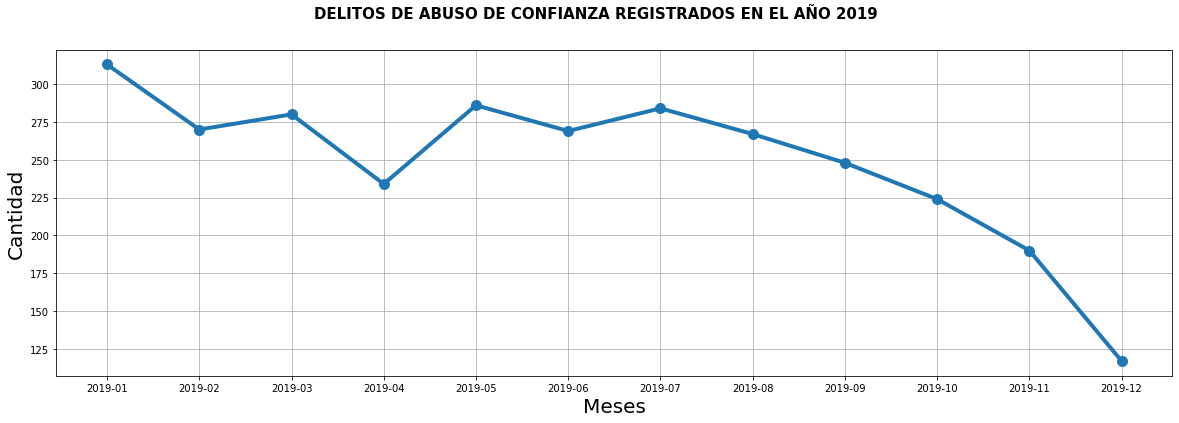

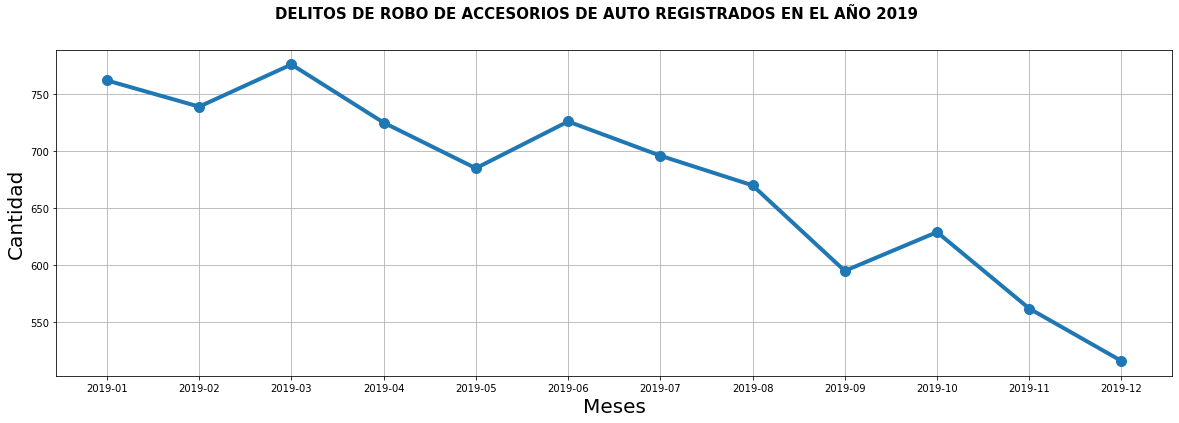

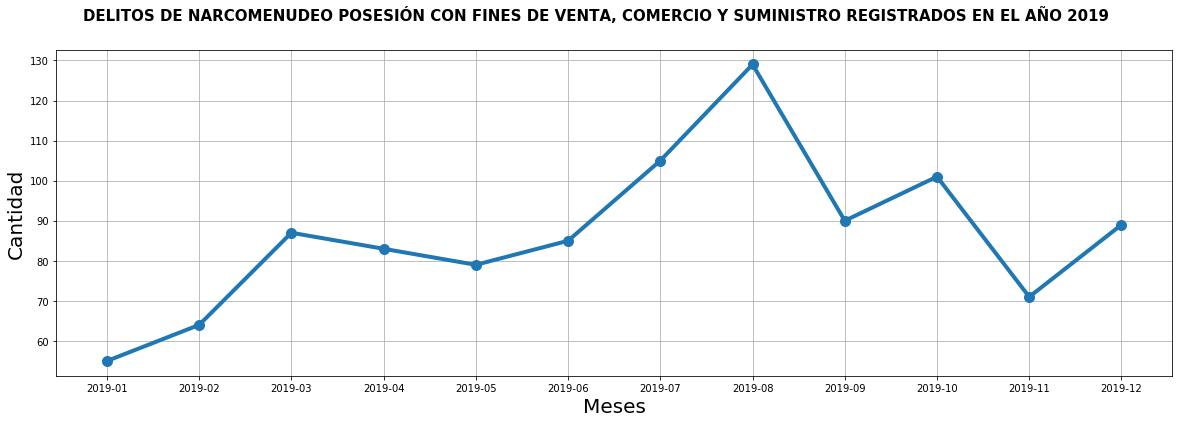

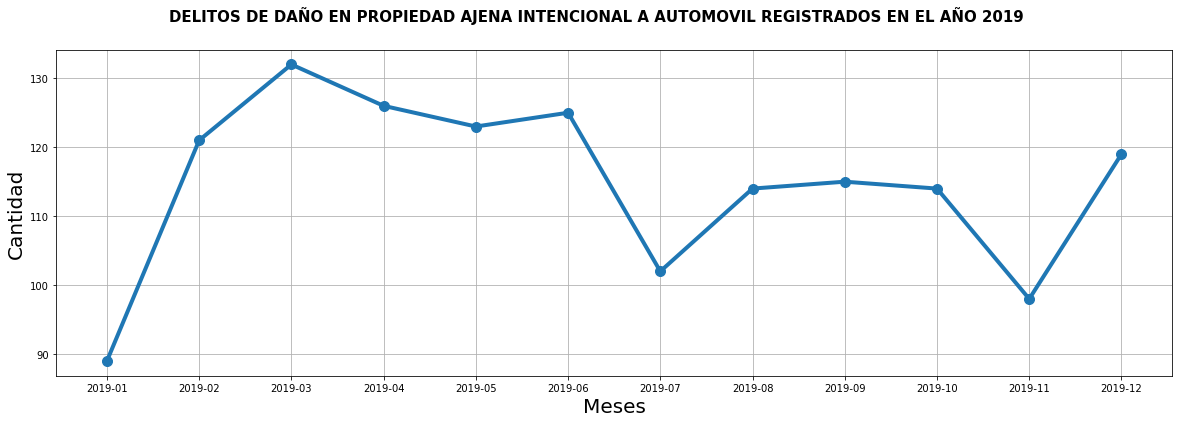

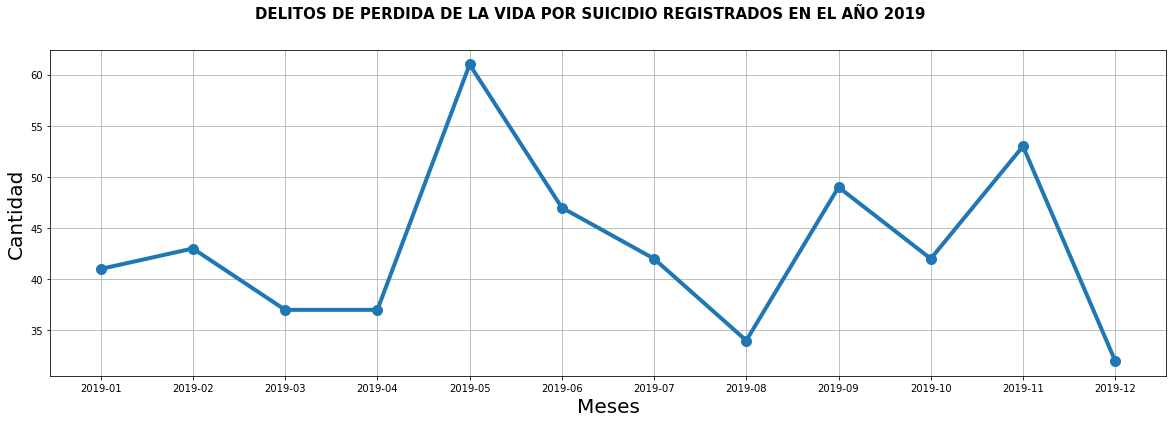

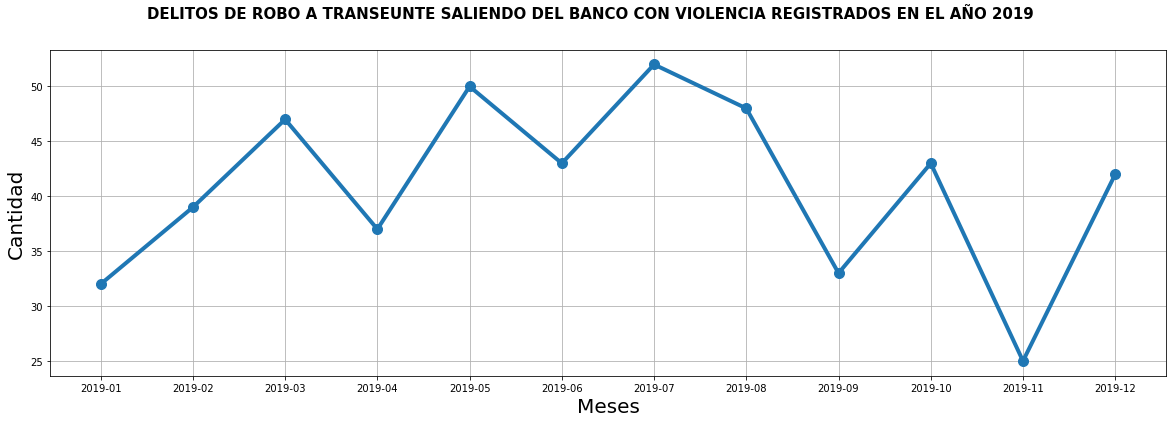

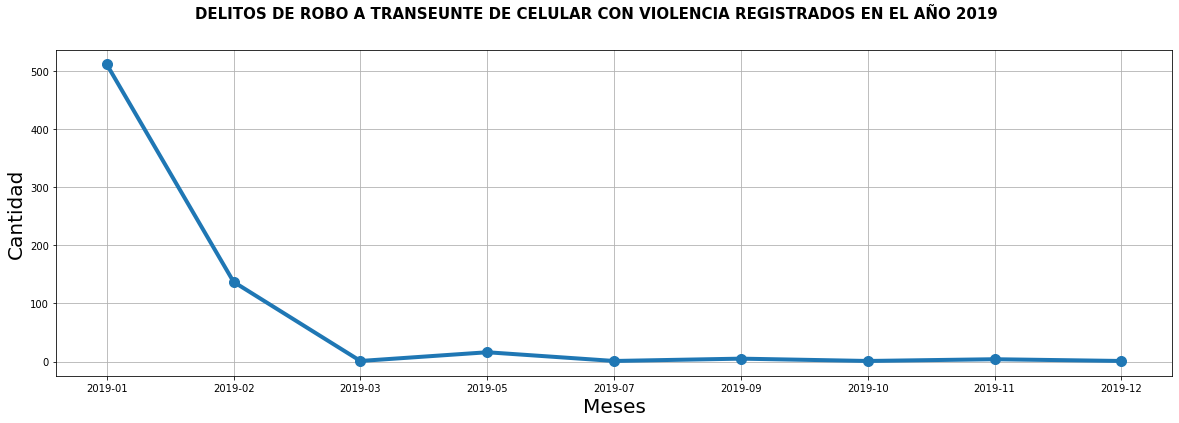

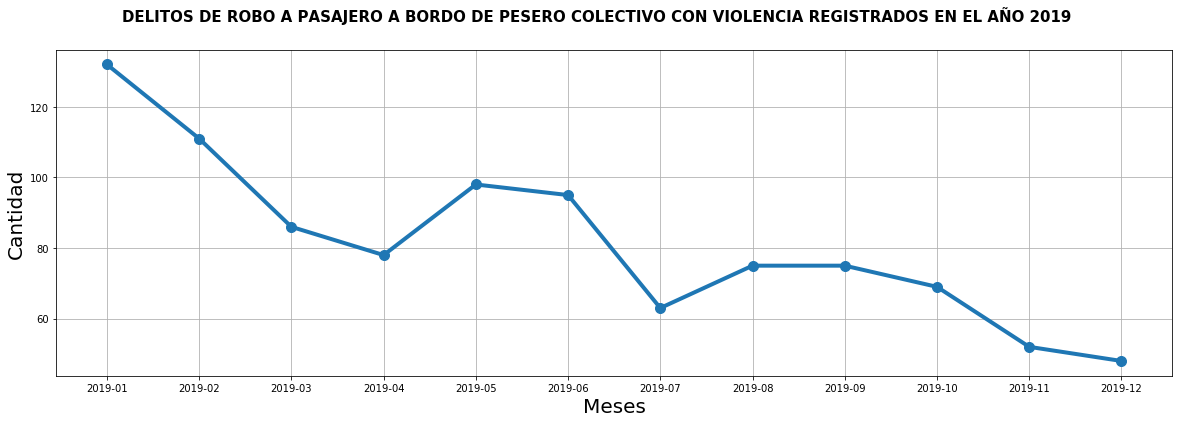

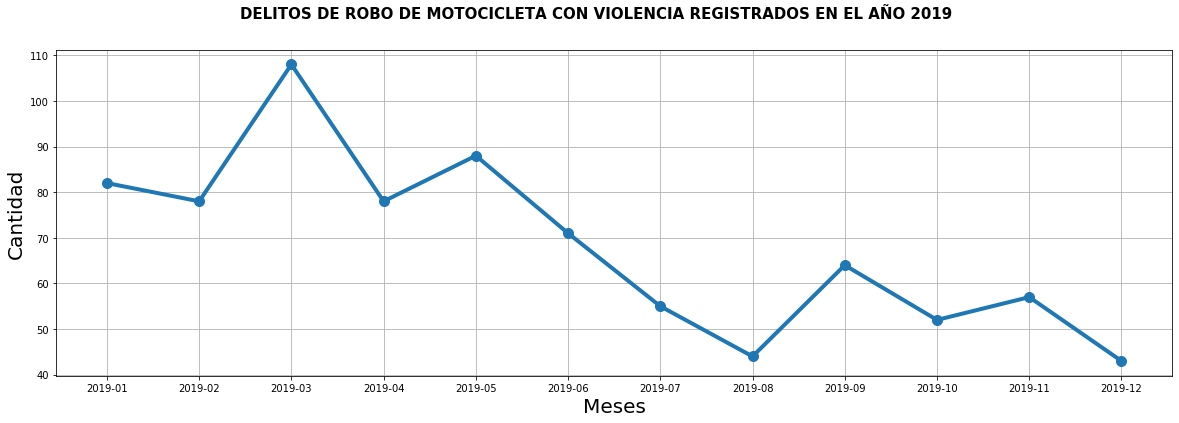

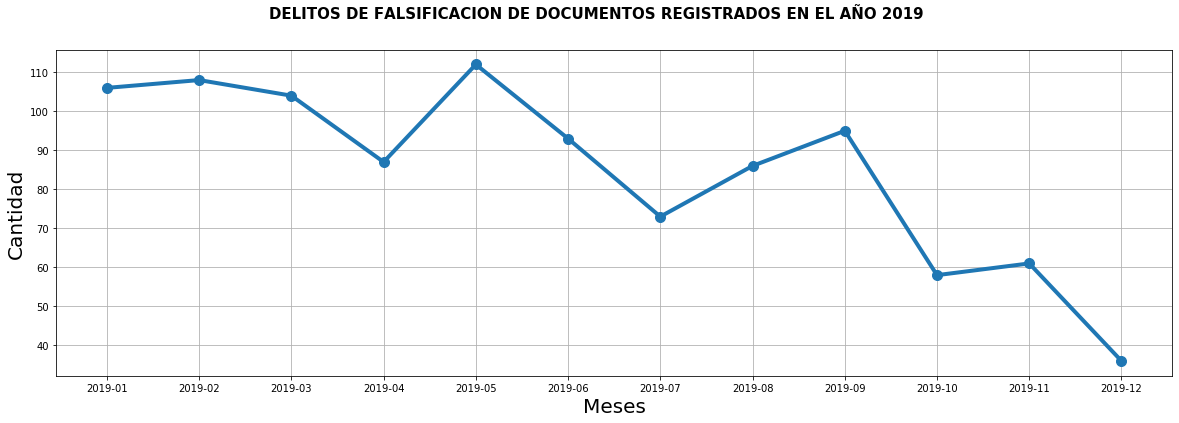

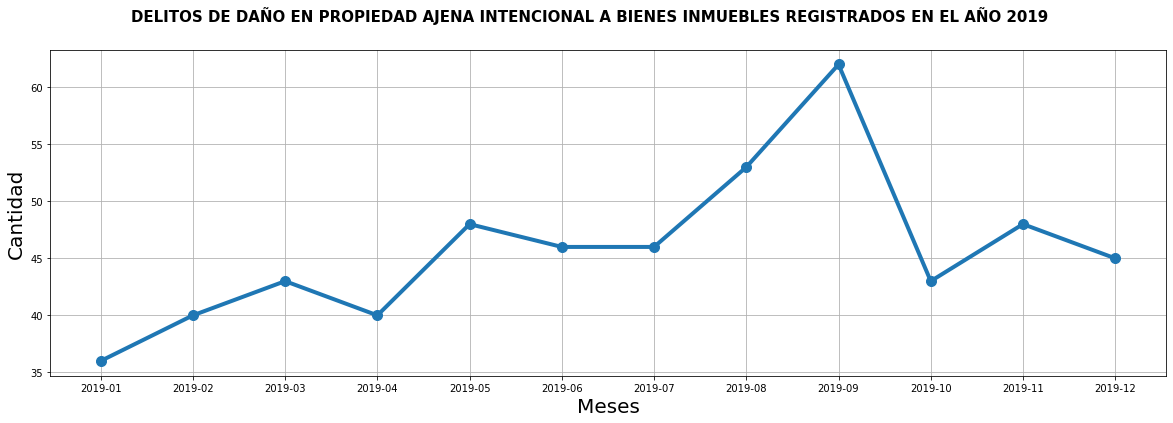

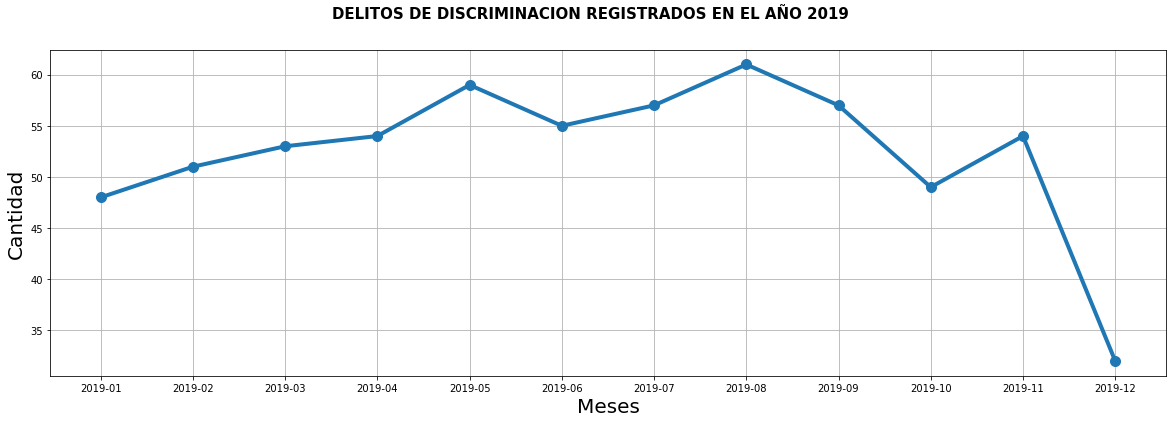

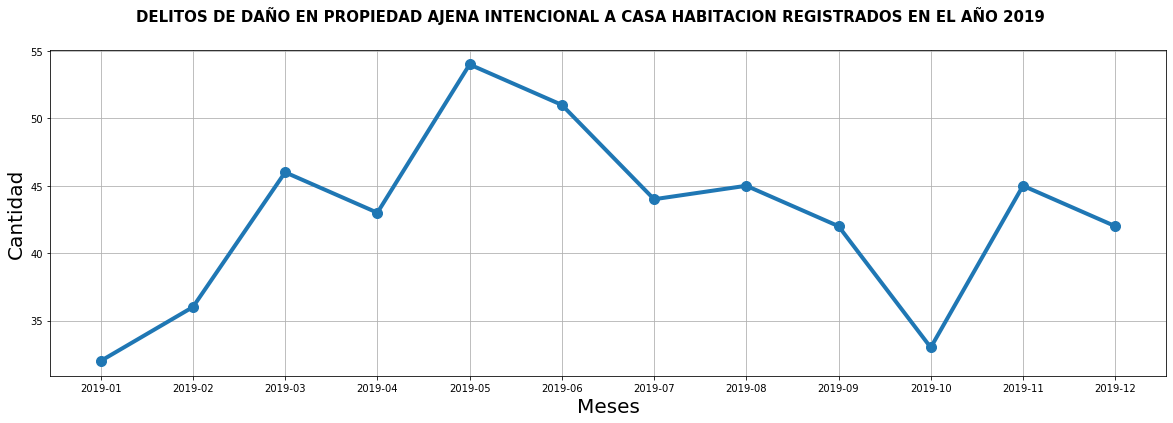

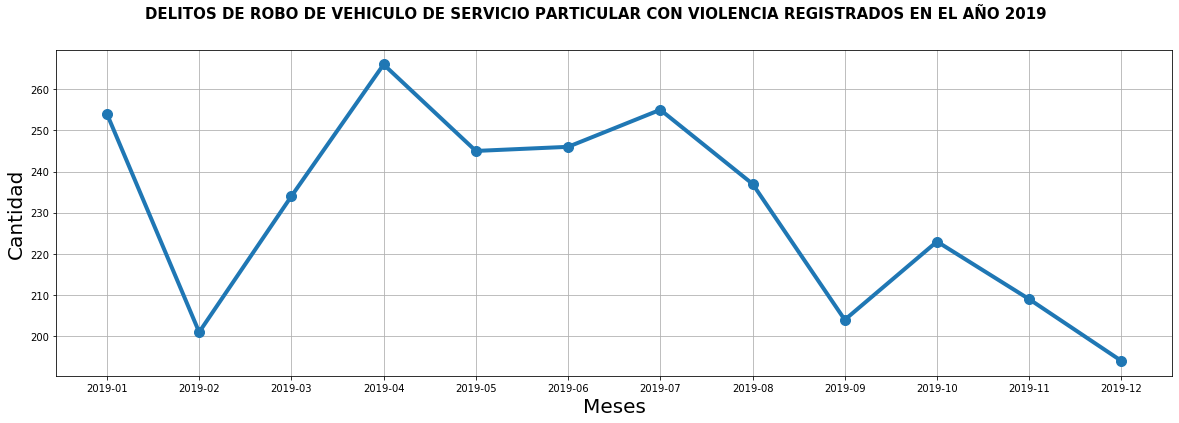

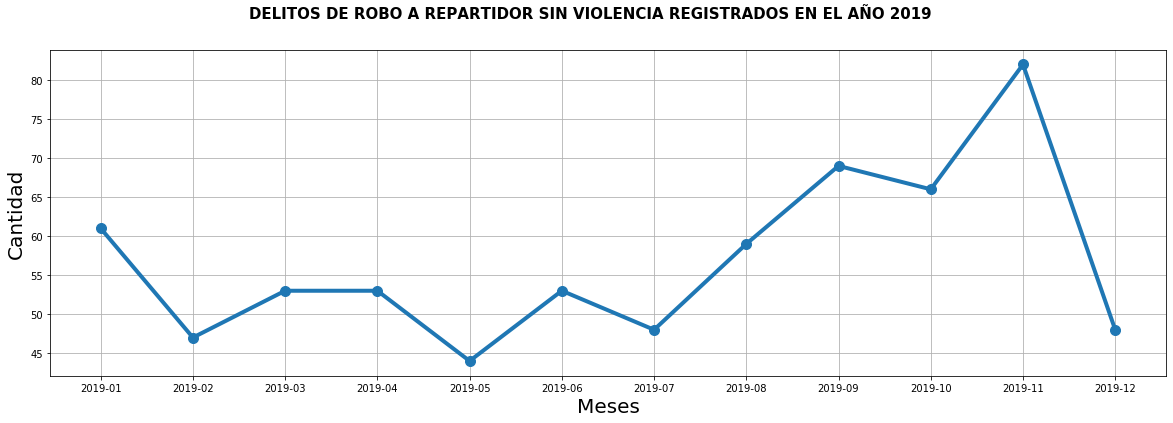

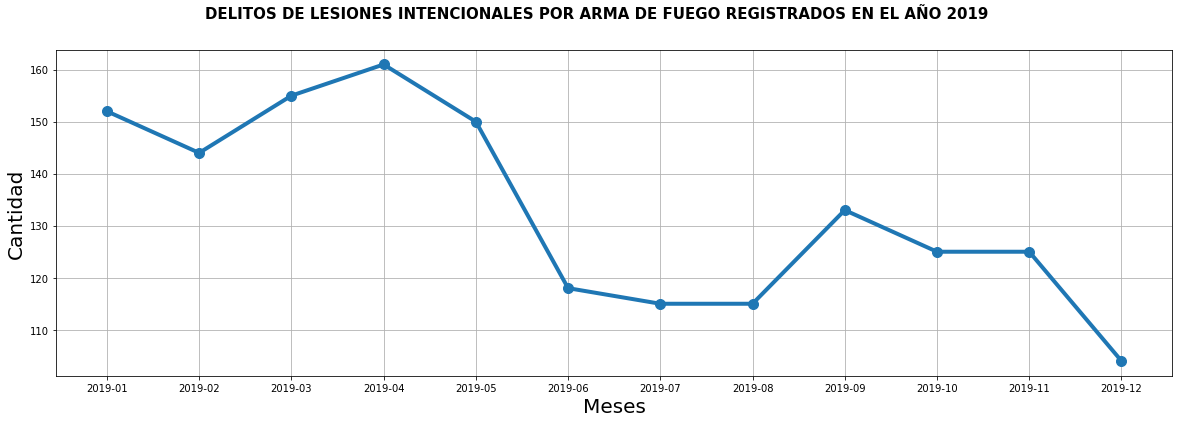

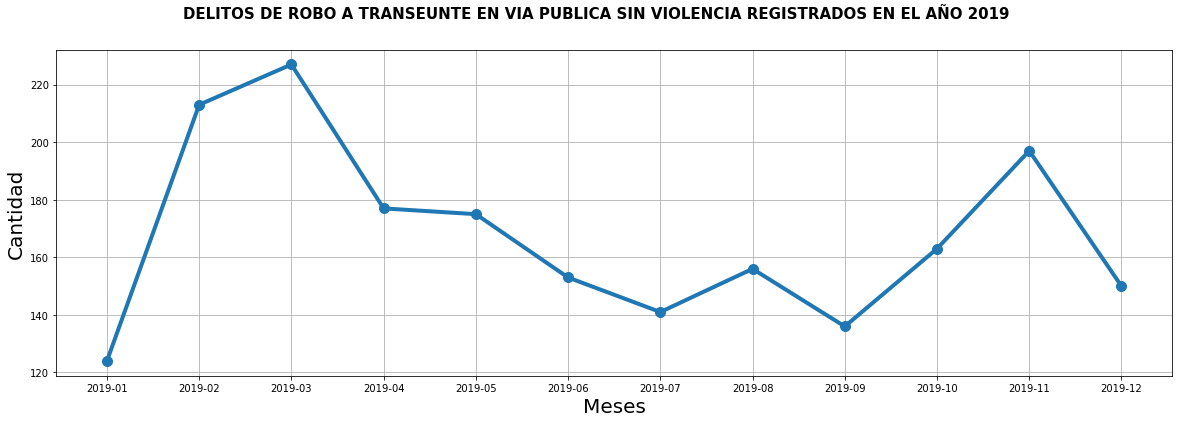

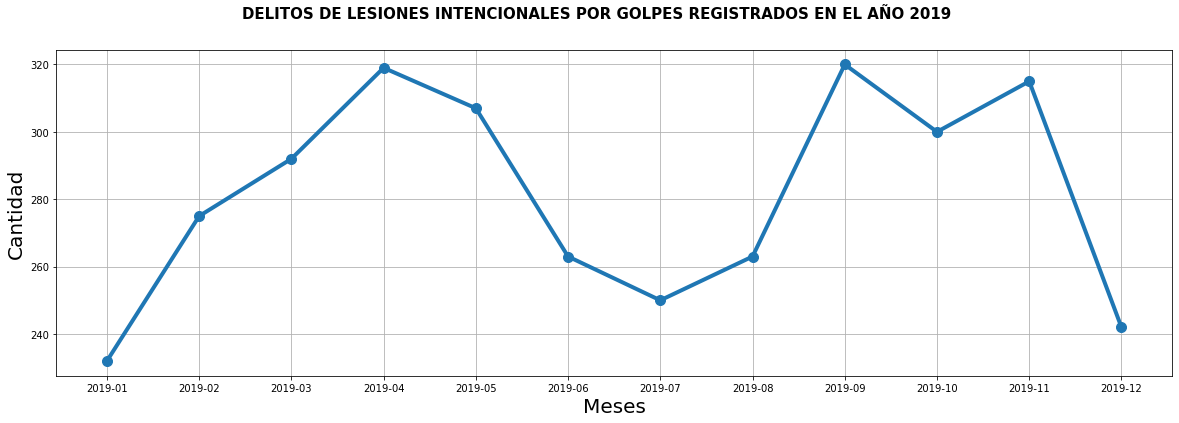

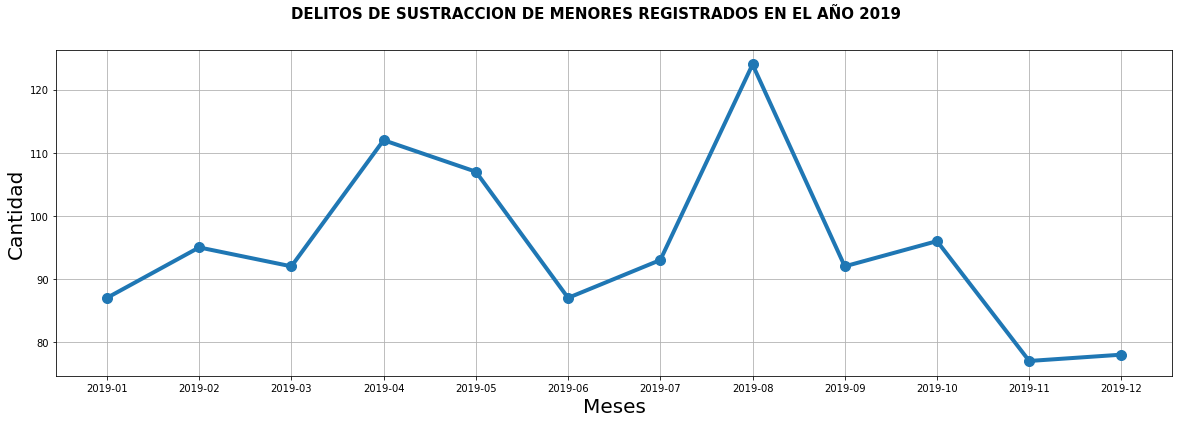

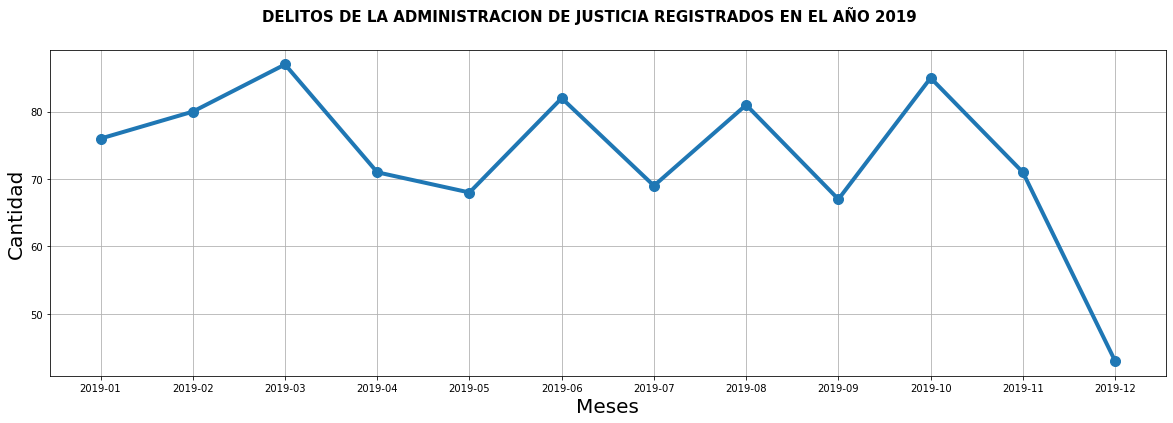

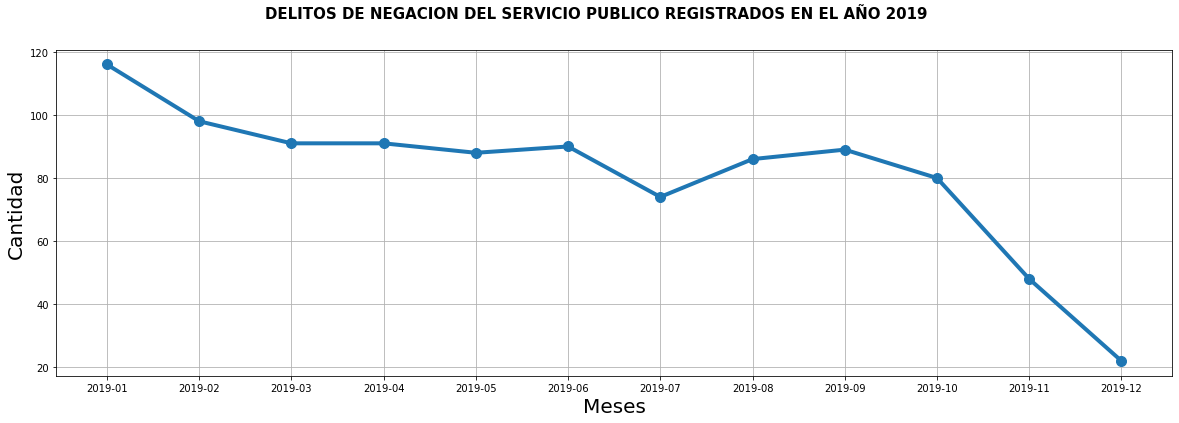

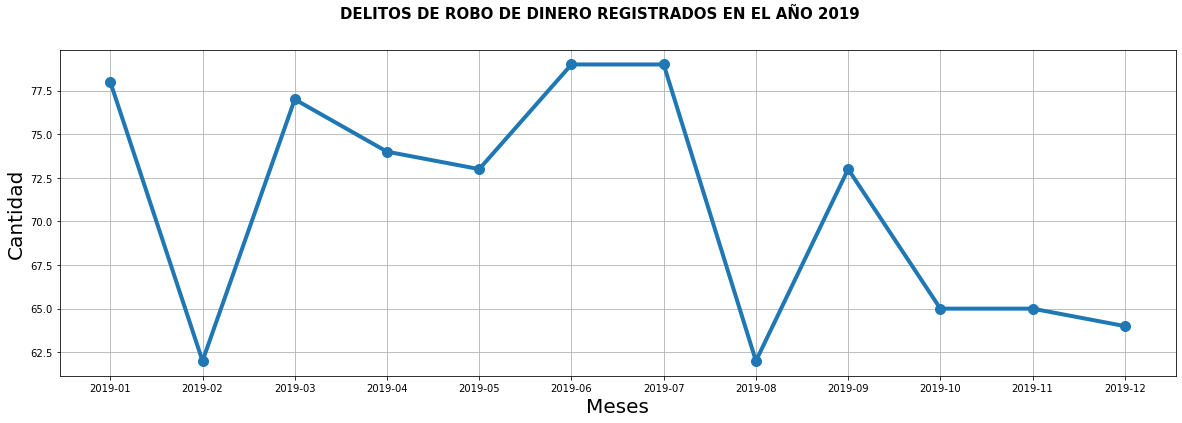

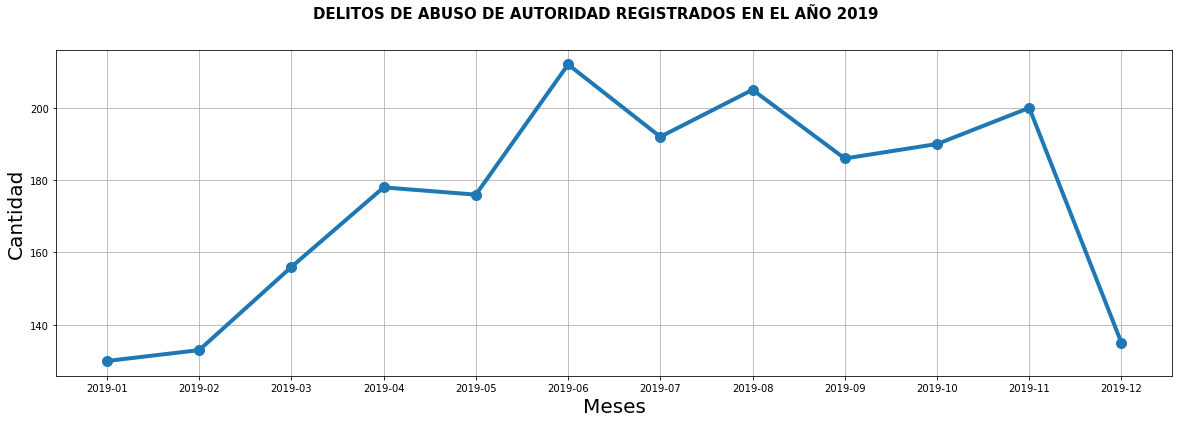

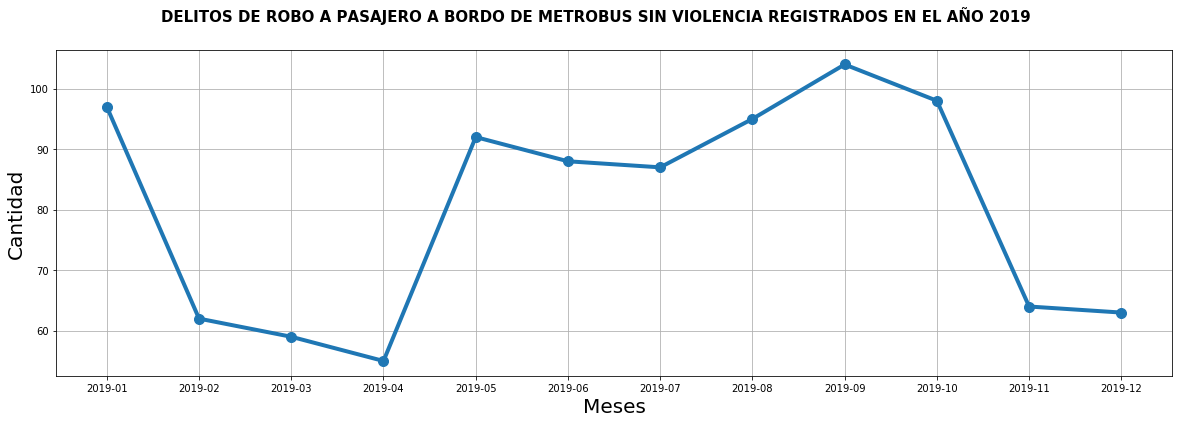

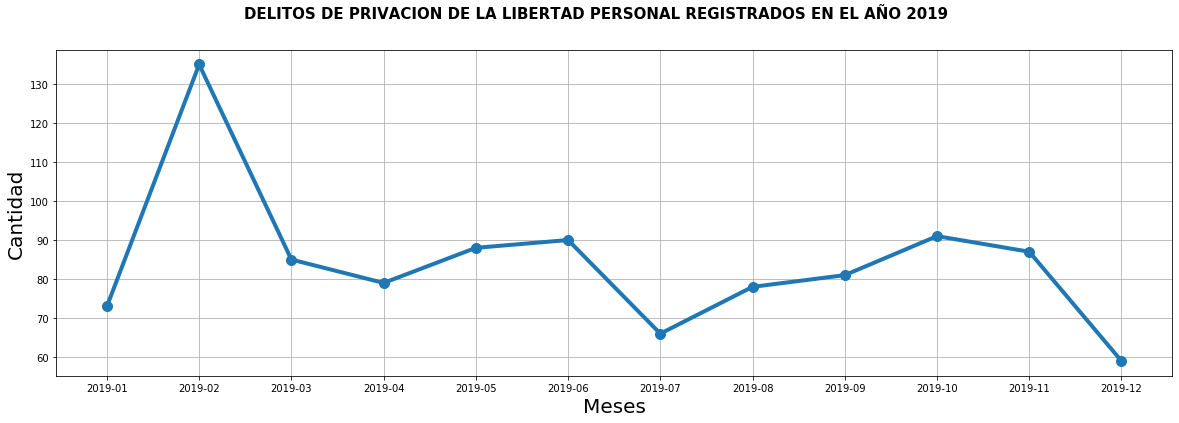

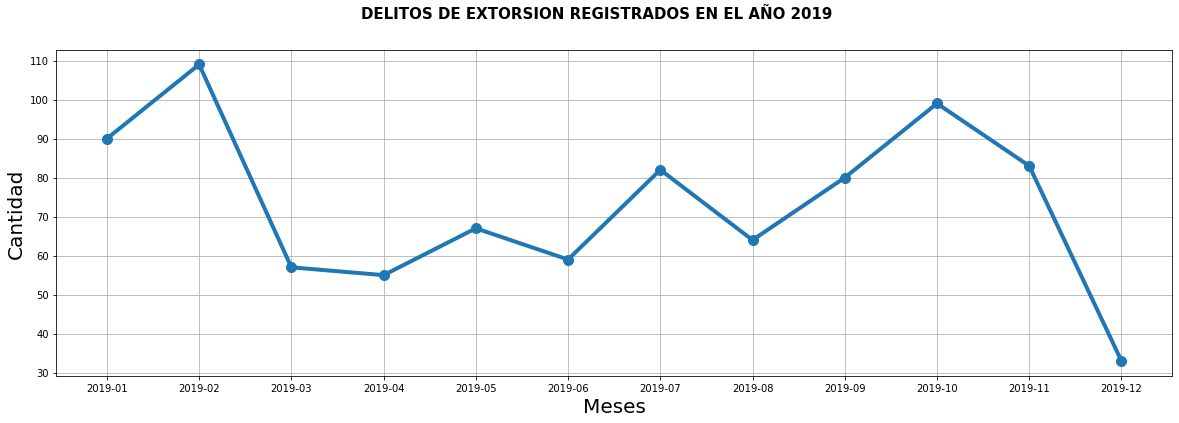

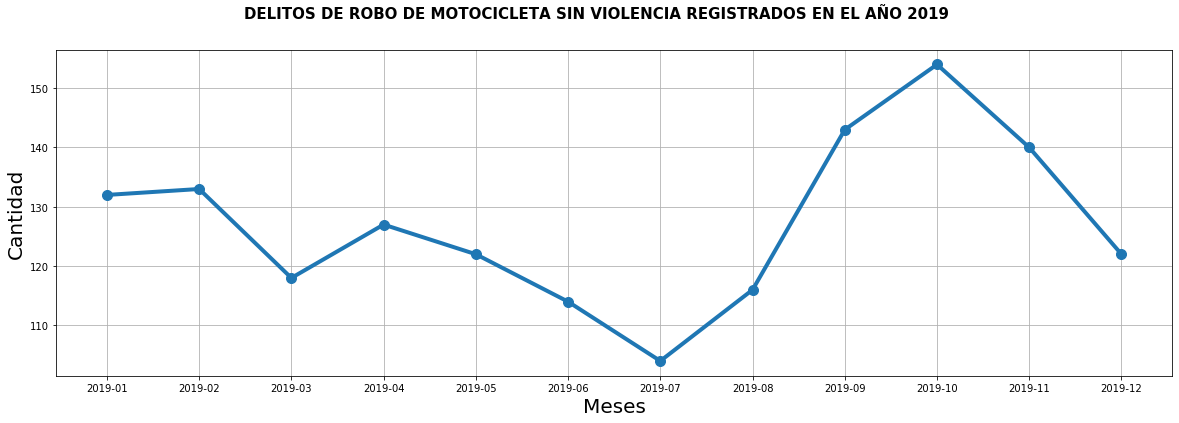

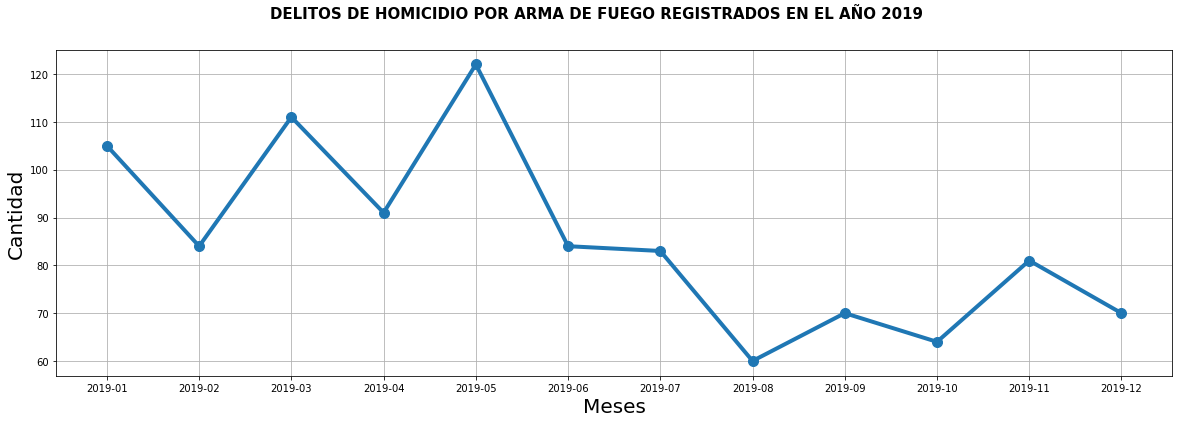

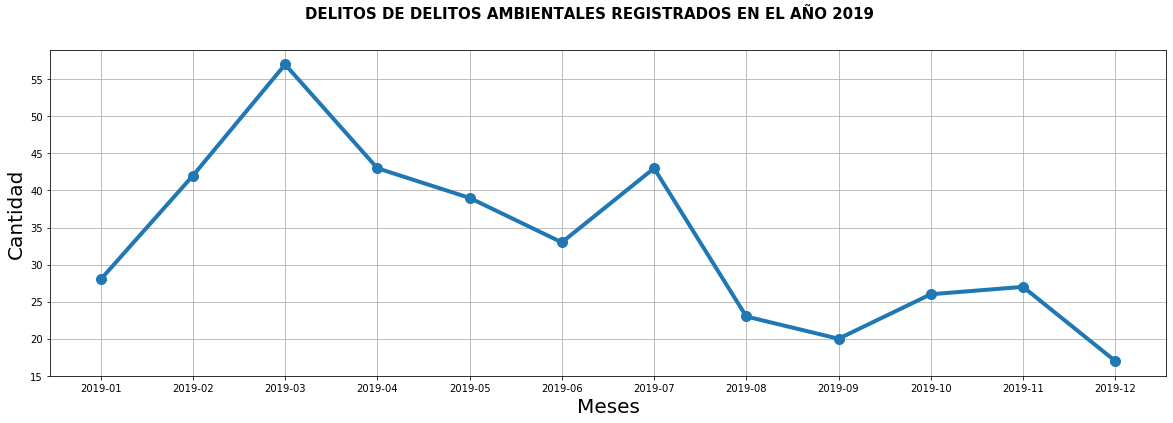

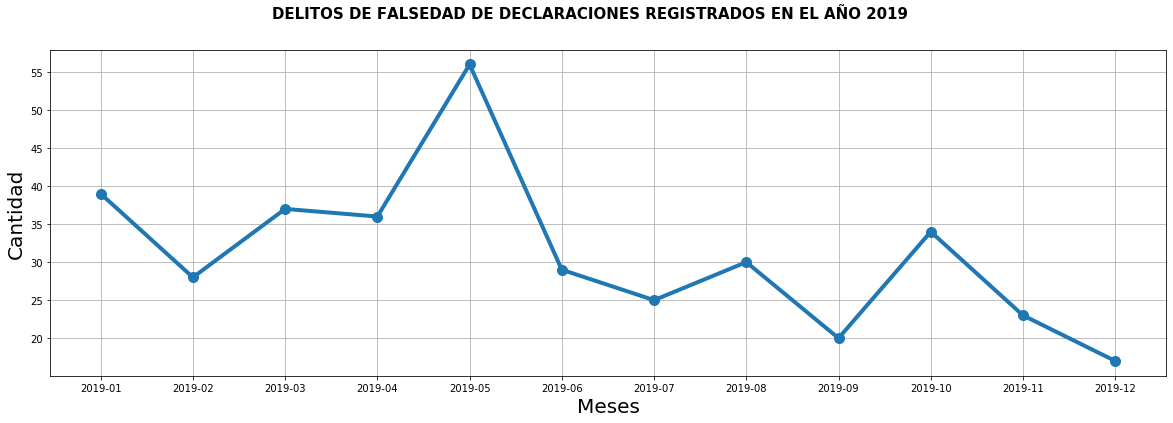

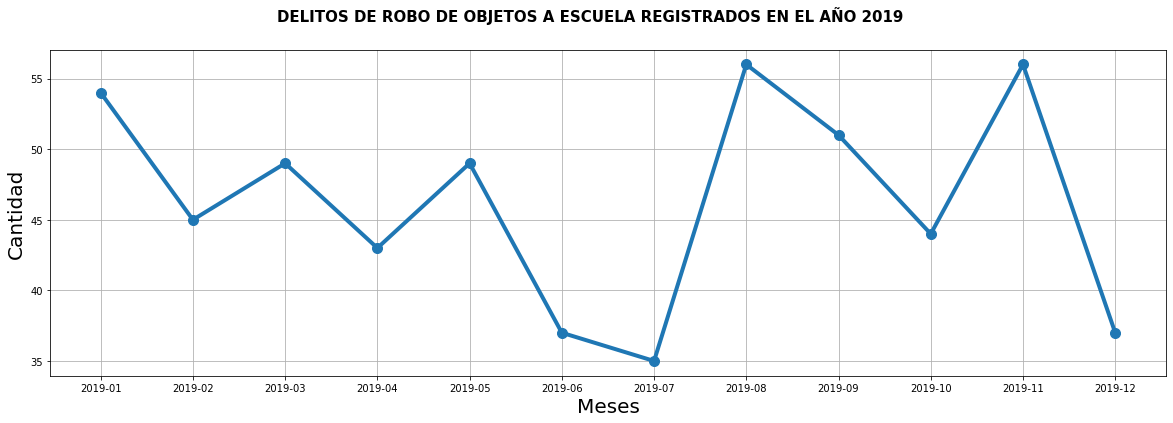

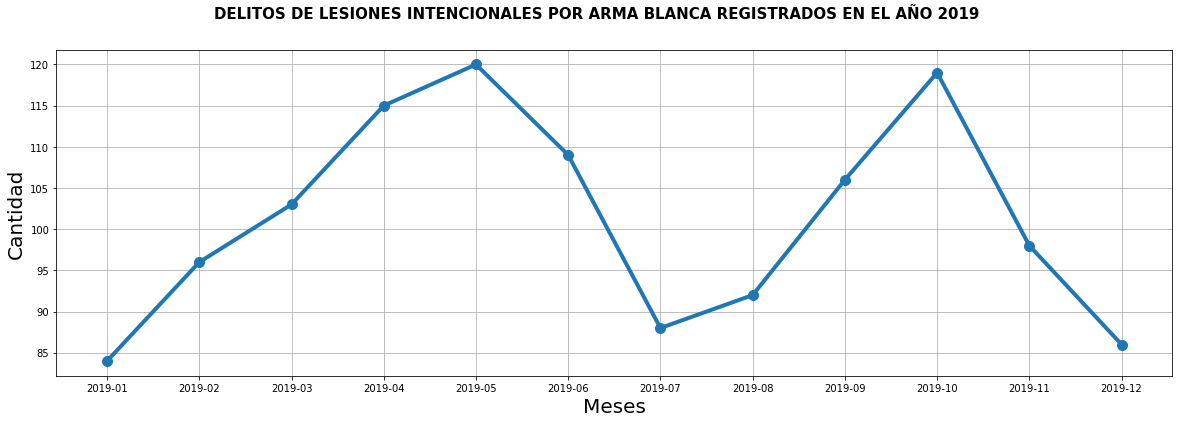

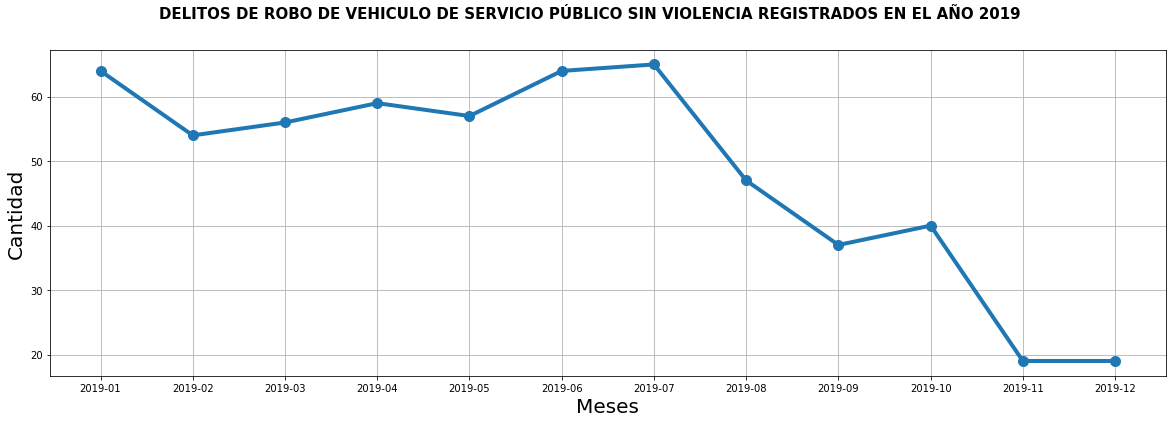

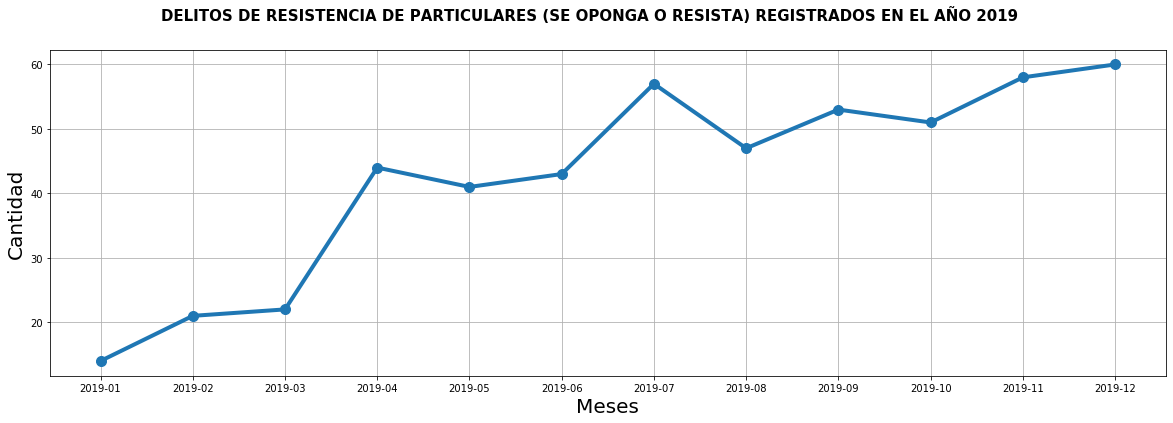

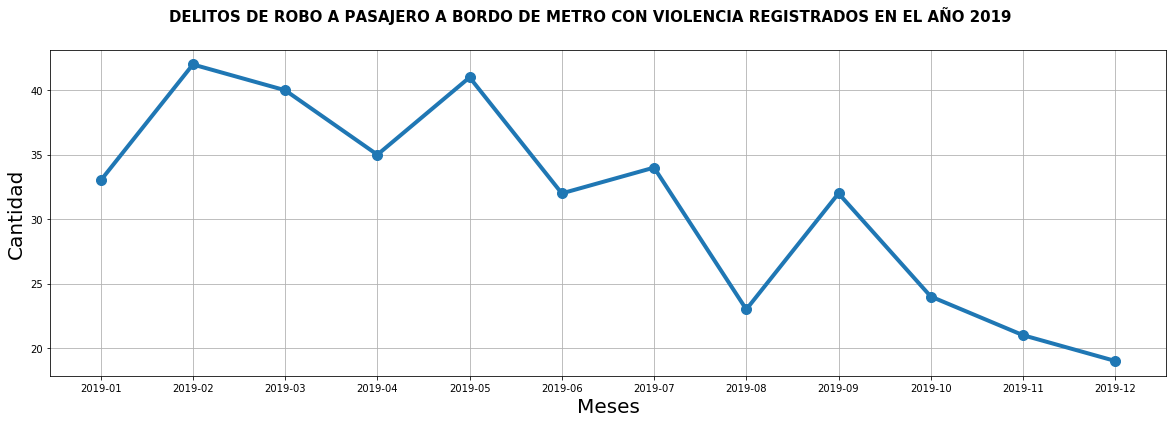

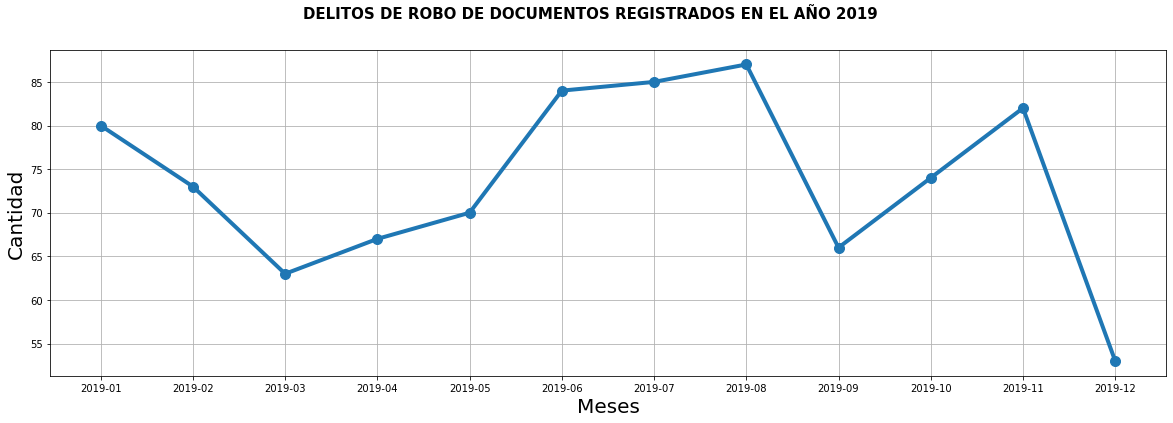

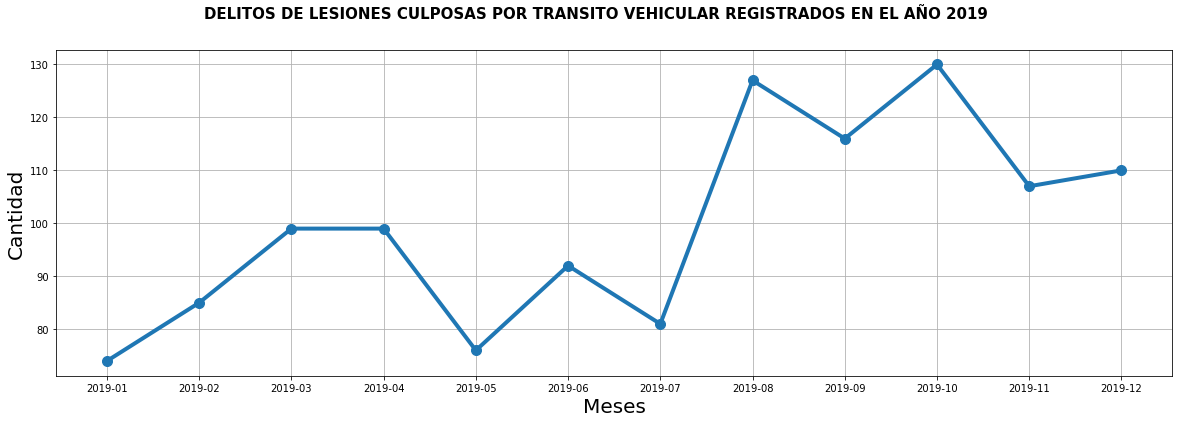

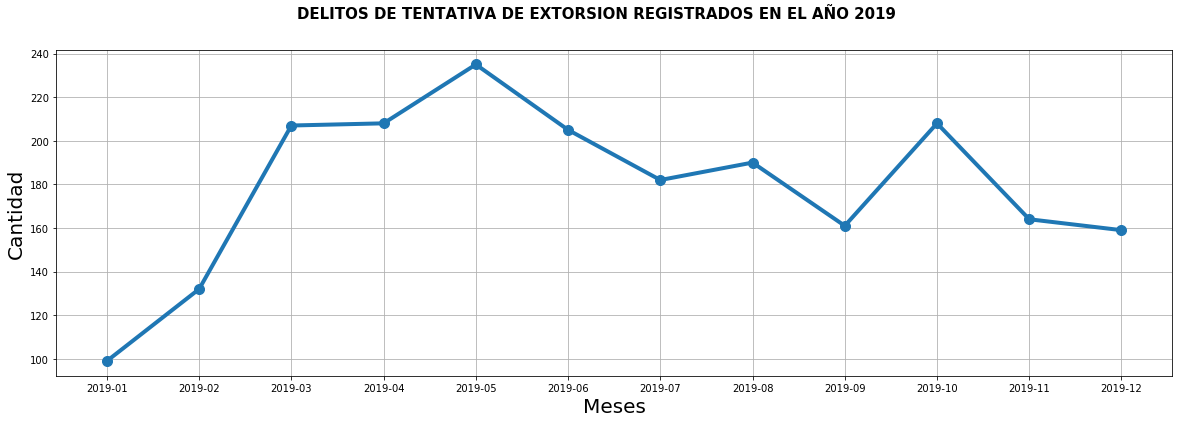

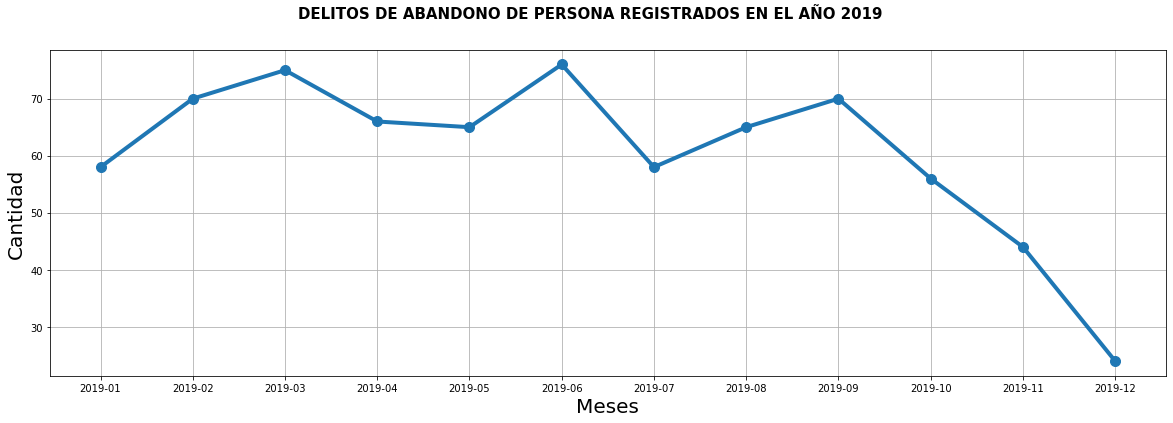

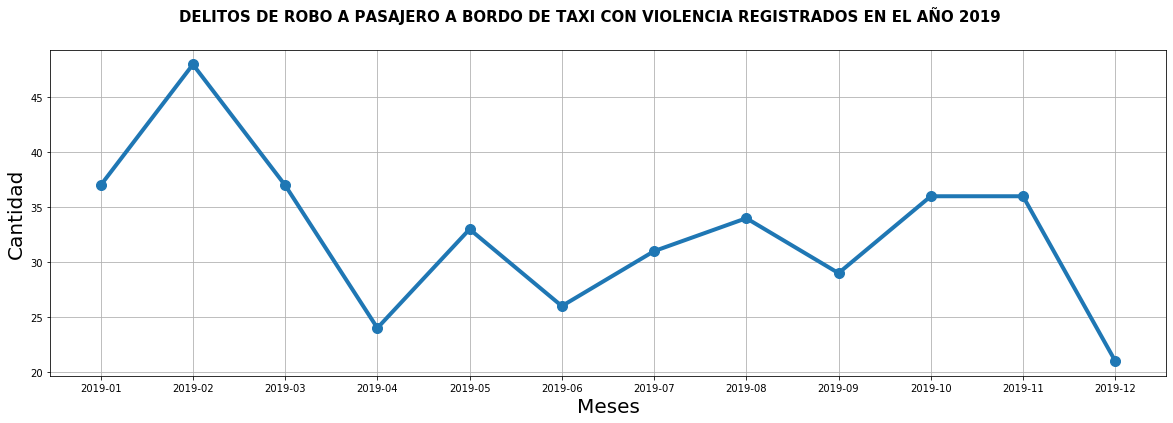

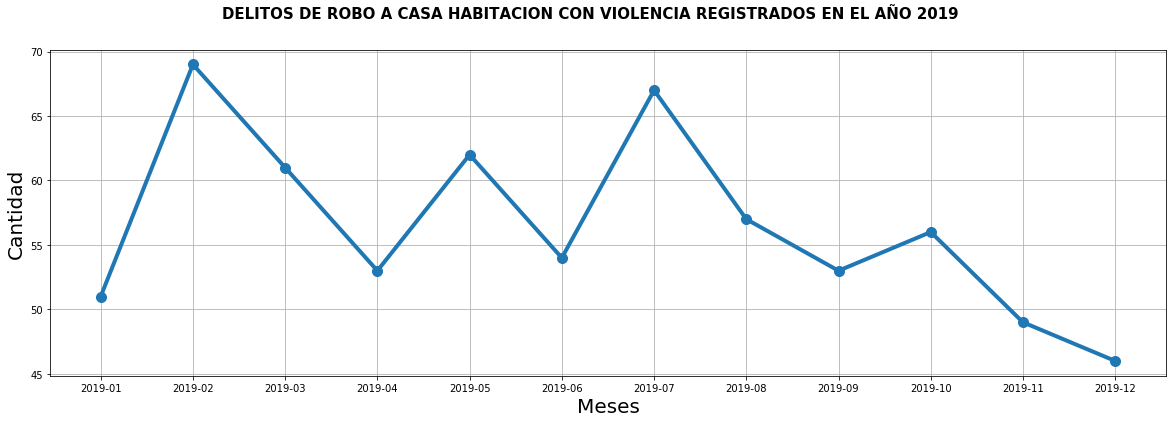

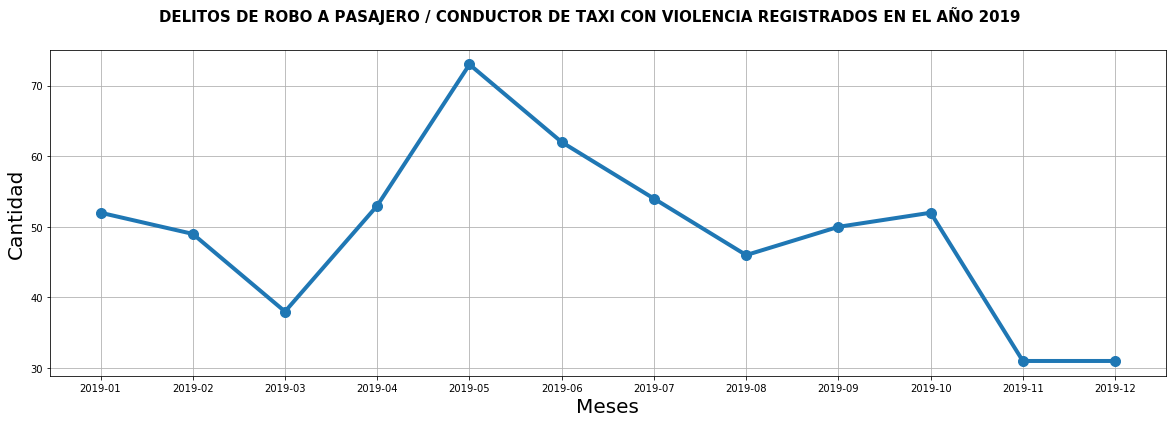

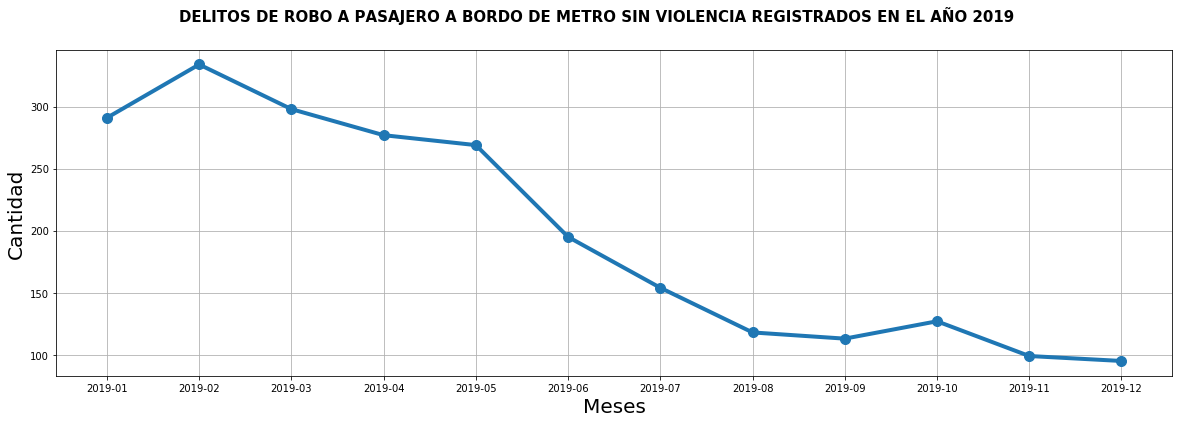

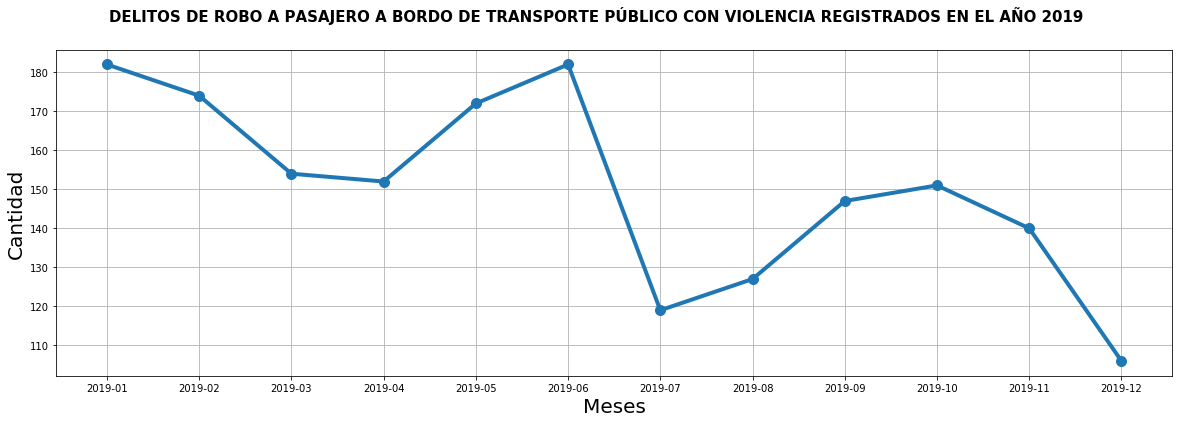

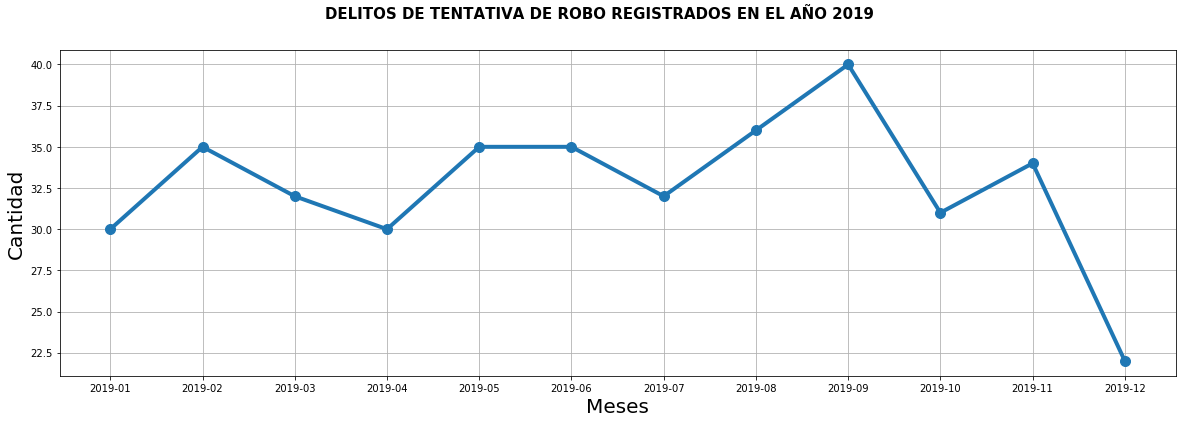

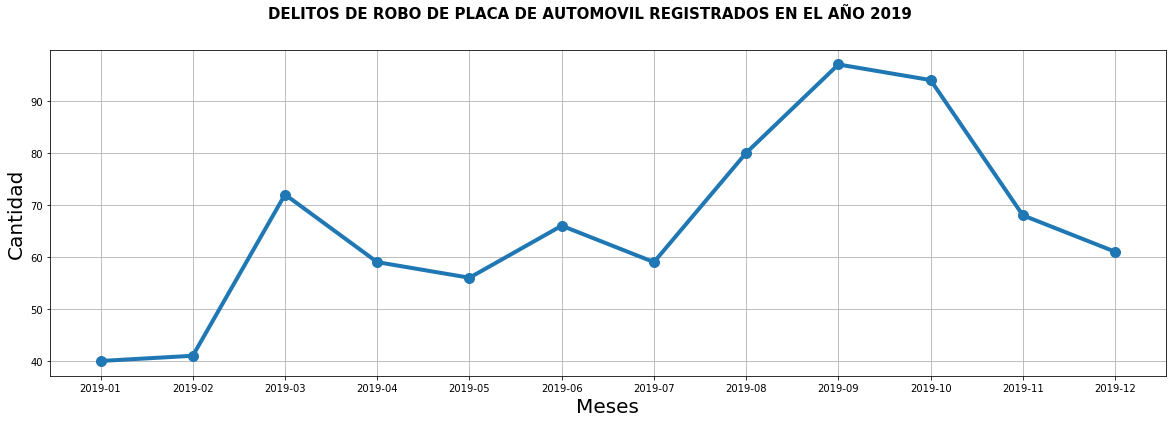

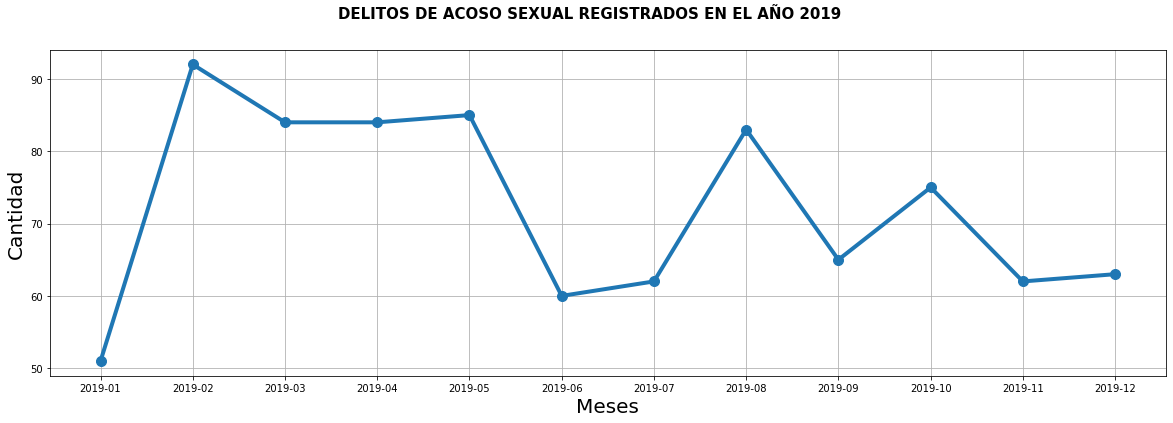

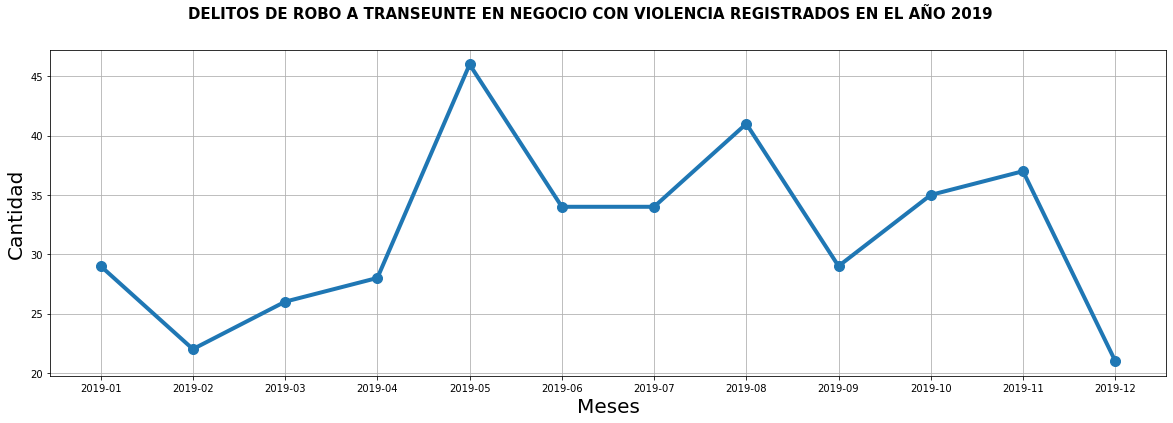

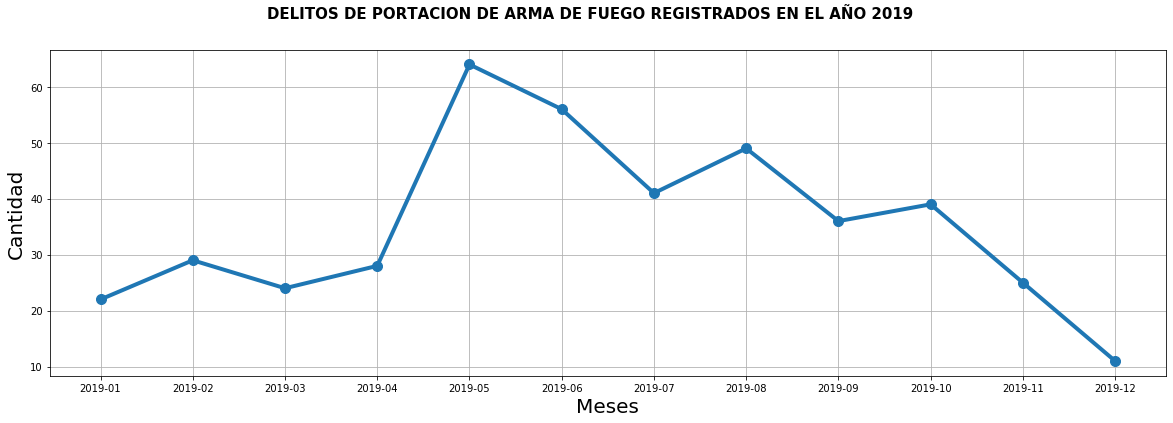

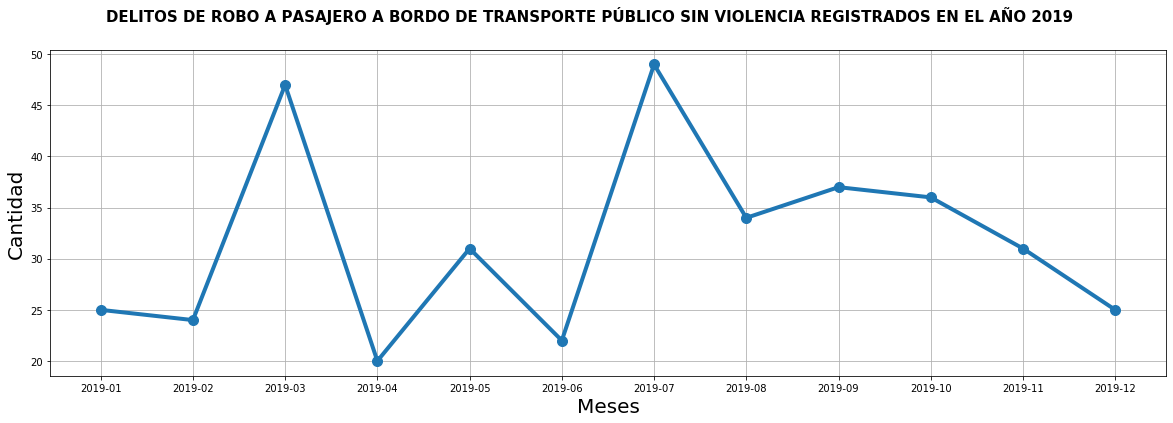

In [28]:
for crime in crime_unique_label_names:
    trenplot = trendView(df_2019, crime)
    name = crime.replace("/","") 
    name = name.replace(" ","") + '.png'
    
    if trenplot != None:
        plt.savefig(name)
    

Algunos de los delitos que con base en los datos se observa van a la baja son:
- Delitos de robo a Transeunte de celular sin violencia
- Delitos de Denuncia
- Delitos de Violencia familar
- Delitos de despojo
- Delitos de Robo de objetos

Algunos de los delitos que con base en los datos se observa van a la alza son:
- Resistencia de particularidades (se oponga o se resista)
- Perdida de la vida por otras causas
- Daño en propiedad ajena intencional a automovil

## 5. ¿Cuál es la alcaldia que más delitos tiene y cuál es la que menos?¿Por que crees que sea esto? 

Para responder esta pregunta, tomaré los datos unicamente a partir del año 2010, ya que los años anteriores tienen muy pocos registros comparados con los años posteriores. Además solo tomaremos las filas en las que alcaldia_hechos corresponda al nombre de una alcaldia de la ciudad de México.

In [73]:
df_5 = datos_clean[datos_clean['ao_hechos'] > 2009.0]
alcaldias = ["ALVARO OBREGON","AZCAPOTZALCO" ,"MILPA ALTA", "GUSTAVO A MADERO", "CUAUHTEMOC", 
             "MIGUEL HIDALGO", "IZTAPALAPA", "BENITO JUAREZ", "COYOACAN", "XOCHIMILCO", 
             "CUAJIMALPA DE MORELOS","VENUSTIANO CARRANZA",  "TLALPAN", "IZTACALCO" ,"TLAHUAC","LA MAGDALENA CONTRERAS"] 

df_5 = df_5[df_5['alcaldia_hechos'].isin(alcaldias)]
years = df_5['ao_hechos'].unique()
print(years)
df_5.head(5)

[2016. 2015. 2014. 2013. 2012. 2011. 2010. 2017. 2018. 2019.]


ao_hechos mes_hechos        fecha_hechos  \
0     2016.0       Mayo 2016-05-19 11:15:00   
1     2015.0  Diciembre 2015-12-04 10:00:00   
2     2016.0       Mayo 2016-05-19 01:30:00   
3     2016.0       Mayo 2016-05-19 12:30:00   
4     2016.0       Mayo 2016-05-06 18:40:00   

                                              delito        categoria_delito  \
0         ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA  DELITO DE BAJO IMPACTO   
1                                 DENUNCIA DE HECHOS      HECHO NO DELICTIVO   
2                                 VIOLENCIA FAMILIAR  DELITO DE BAJO IMPACTO   
3  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...  DELITO DE BAJO IMPACTO   
4                                            DESPOJO  DELITO DE BAJO IMPACTO   

                                            fiscalia agencia  \
0  INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...  STCMZV   
1  INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...   FDS-6   
2                        INVESTIGACIÓN EN IZTAPALAPA   IZP-2   
3                 INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2   
4                           INVESTIGACIÓN EN TLAHUAC   TLH-2   

  unidad_investigacion   alcaldia_hechos  \
0               UI-1CD        CUAUHTEMOC   
1             FDS-6-01  GUSTAVO A MADERO   
2               UI-1CD        IZTAPALAPA   
3               UI-1CD  GUSTAVO A MADERO   
4               UI-1SD        IZTAPALAPA   

                             colonia_hechos  ao_inicio mes_inicio  \
0                                  DOCTORES       2016       Mayo   
1                       CHALMA DE GUADALUPE       2016       Mayo   
2                       LOS REYES CULHUACÁN       2016       Mayo   
3              GERTRUDIS SANCHEZ 3A SECCION       2016       Mayo   
4  AREA FEDERAL PANTEON SAN LORENZO TEZONCO       2016       Mayo   

          fecha_inicio                                       calle_hechos  \
0  2016-05-19 13:09:32  INTERIOR VAGON DEL METRO ESTACION NIÑOS HÉROES...   
1  2016-05-19 13:09:56                      QUERETARO NO.86 MZ 520  LT 13   
2  2016-05-19 13:21:33                              CUAUHTEMOC MZ.15 LT.8   
3  2016-05-19 13:24:45                                     CALLE NORTE 84   
4  2016-05-19 13:25:05                                        PROVIDENCIA   

         calle_hechos2   longitud    latitud                  geopoint  
0         NIÑOS HEROES -99.150633  19.419482  19.4194819998,-99.150633  
1                  NaN -99.153112  19.549869  19.5498689998,-99.153112  
2                SILOS -99.110467  19.347049  19.3470489998,-99.110467  
3  ESQUINA ORIENTE 107 -99.101675  19.462630  19.4626299998,-99.101675  
4               TESORO -99.056319  19.308832  19.3088319998,-99.056319

In [74]:
df_5.groupby(["alcaldia_hechos"])["alcaldia_hechos"].count().sort_values(ascending=False)

alcaldia_hechos
CUAUHTEMOC                149095
IZTAPALAPA                139068
GUSTAVO A MADERO           91960
BENITO JUAREZ              80212
COYOACAN                   62030
MIGUEL HIDALGO             61580
ALVARO OBREGON             61548
VENUSTIANO CARRANZA        53559
TLALPAN                    53211
AZCAPOTZALCO               44574
IZTACALCO                  39158
XOCHIMILCO                 28230
TLAHUAC                    21294
LA MAGDALENA CONTRERAS     13986
CUAJIMALPA DE MORELOS      13240
MILPA ALTA                  6011
Name: alcaldia_hechos, dtype: int64

Deacuerdo a la tabla anterior, podemos ver que 
- la alcaldia con mayor registro de delitos es la alcaldia **Cuauhtemoc** 
- y la alcaldia con menor registro es **Milpa Alta**. 

Cuando hablamos de un problema social, como en este caso, la delicuencia, existen numerosos factores que influyen a crear zonas en las que se concentra la mayor cantidad de comision de delitos. Como la **cantidad de habitantes**, el **flujo de visitantes**, el **flujo de dinero**, entre otros.

#  6. Dentro de cada alcaldia, ¿Cuáles son las tres colonias con más delitos? 

In [150]:
def most_freq(df, Alcaldia_name):
    """Esta función devuelve los tres colonias con más registro de delitos en Alcaldia_name"""
    local_df = df[df['alcaldia_hechos'] == Alcaldia_name]
    local_df = local_df.groupby(['colonia_hechos'])['delito'].count().sort_values(ascending = False)
    local_df = pd.DataFrame(local_df)
    local_df = local_df.reset_index(drop=False)
    local_df.rename(columns = {'delito':'Cantidad'})
    
    
    return local_df.iloc[0:3, 0:2]   

## Ahora veamos cuales son las colonias con mayor registro delictivo para cada Alcaldia:

In [76]:
for alcaldia in alcaldias:
    most_delictive = most_freq(df_5, alcaldia)
    print(alcaldia)
    print(most_delictive)
    print("__________________________________________")

ALVARO OBREGON
          colonia_hechos  delito
0  JARDINES DEL PEDREGAL    2740
1              SAN ANGEL    2354
2         ZEDEC SANTA FE    2174
__________________________________________
AZCAPOTZALCO
           colonia_hechos  delito
0              EL ROSARIO    3201
1      INDUSTRIAL VALLEJO    2182
2  CENTRO DE AZCAPOTZALCO    2022
__________________________________________
MILPA ALTA
                     colonia_hechos  delito
0  CRUZTITLA (SAN ANTONIO TECOMITL)     435
1   SANTA MARTHA (VILLA MILPA ALTA)     399
2  SAN MIGUEL (SAN PABLO OZTOTEPEC)     389
__________________________________________
GUSTAVO A MADERO
        colonia_hechos  delito
0           LINDAVISTA    4224
1    GUADALUPE TEPEYAC    3722
2  SAN FELIPE DE JESÚS    2663
__________________________________________
CUAUHTEMOC
  colonia_hechos  delito
0         CENTRO   32323
1       DOCTORES   18743
2     ROMA NORTE   11742
__________________________________________
MIGUEL HIDALGO
                   colonia_hechos  

# 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)? 


### Vamos a observar la tendencia estacional en los delitos de Violencia Familiar

In [77]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918756 entries, 0 to 931006
Data columns (total 18 columns):
ao_hechos               918756 non-null float64
mes_hechos              918756 non-null object
fecha_hechos            918756 non-null datetime64[ns]
delito                  918756 non-null object
categoria_delito        918756 non-null object
fiscalia                918756 non-null object
agencia                 918756 non-null object
unidad_investigacion    918535 non-null object
alcaldia_hechos         918756 non-null object
colonia_hechos          891615 non-null object
ao_inicio               918756 non-null int64
mes_inicio              918756 non-null object
fecha_inicio            918756 non-null object
calle_hechos            916633 non-null object
calle_hechos2           367498 non-null object
longitud                892400 non-null float64
latitud                 892400 non-null float64
geopoint                892400 non-null object
dtypes: datetime64[ns](1), float6

In [171]:
trade_df = df_5.copy()
trade_df = trade_df[trade_df['delito'] == "VIOLENCIA FAMILIAR"]
trade_df["fecha_hechos"] = trade_df["fecha_hechos"].apply(quitDay2)
trade_df = trade_df.groupby(['fecha_hechos'])['fecha_hechos'].count()
trade_df = pd.DataFrame(trade_df)
trade_df.head()

fecha_hechos
fecha_hechos              
2010-01-01               2
2010-02-01               3
2010-04-01               1
2010-06-01               1
2010-09-01               2

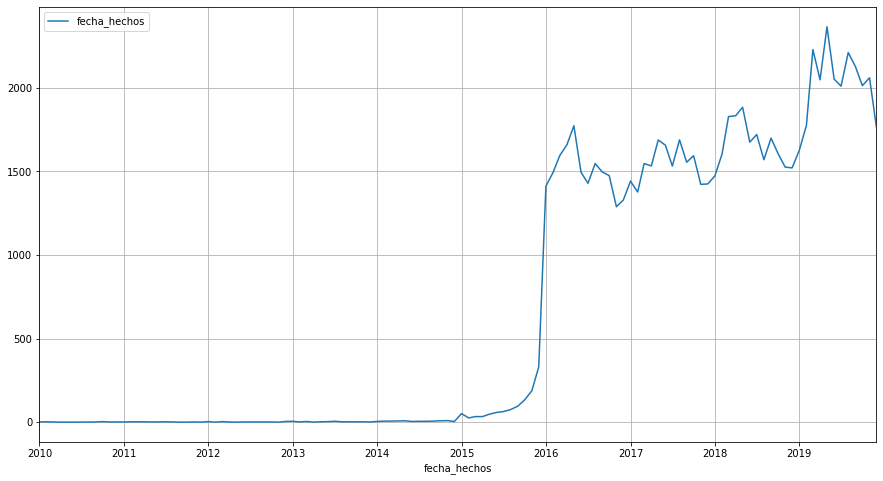

In [174]:
trade_df.plot(grid=True, figsize=(15,8))

## En el gráfico anterior, vemos que los datos de año 2010 al 2015 no tienen consistencia con los datos de los años posteriores. Para una mejor vista, vamos a considerar unicamente los datos a partir del año 2016

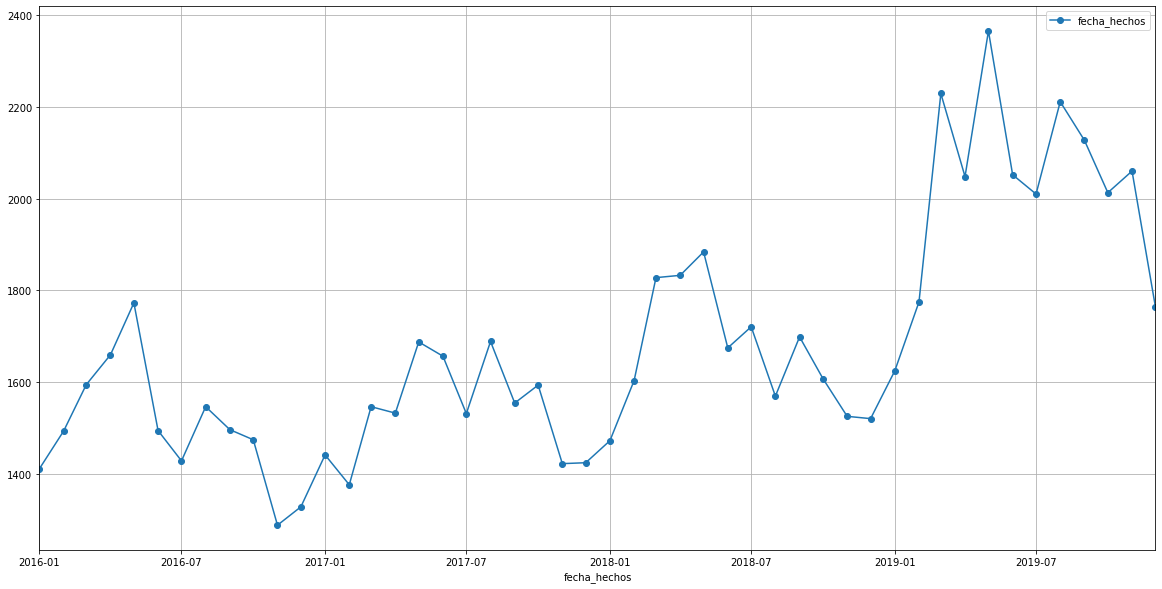

In [168]:
from datetime import date
start_date = date(2016,1,1)
end_date = date(2019,12,1)

trade_df[(start_date <= trade_df.index) & (trade_df.index <= end_date)].plot(grid=True, figsize=(20,10), marker ='o')

## En la gráfica anterior podemos observar que el indice del delito de Violencia Familiar regristra un minimo entre  el mes de Noviembre y Diciembre de cada año

## Así también, observamos que se registra un máximo en el mes de Mayo de cada año.

## Podemos hacer una analisis similar para cada delito, y también podemos utilizar técnicas más precisas, por ejemplo, podriamos calcular el indice estacional.






#  8. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldia y con menor frecuencia en las demás.

Vamos a crear una tabla de frecuencias. Seguimos utilizando los datos a partir del año 2016.

In [201]:
df_current = df_5.copy()
df_current = df_current[df_current['ao_hechos'] > 2015.0]

matrix_freq = pd.DataFrame(index = alcaldias, columns = crime_unique_label_names)
matrix_freq.head()

ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA  \
ALVARO OBREGON                                          NaN   
AZCAPOTZALCO                                            NaN   
MILPA ALTA                                              NaN   
GUSTAVO A MADERO                                        NaN   
CUAUHTEMOC                                              NaN   

                 DENUNCIA DE HECHOS VIOLENCIA FAMILIAR  \
ALVARO OBREGON                  NaN                NaN   
AZCAPOTZALCO                    NaN                NaN   
MILPA ALTA                      NaN                NaN   
GUSTAVO A MADERO                NaN                NaN   
CUAUHTEMOC                      NaN                NaN   

                 LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION DESPOJO  \
ALVARO OBREGON                                                  NaN       NaN   
AZCAPOTZALCO                                                    NaN       NaN   
MILPA ALTA                                                      NaN       NaN   
GUSTAVO A MADERO                                                NaN       NaN   
CUAUHTEMOC                                                      NaN       NaN   

                 ROBO DE OBJETOS  \
ALVARO OBREGON               NaN   
AZCAPOTZALCO                 NaN   
MILPA ALTA                   NaN   
GUSTAVO A MADERO             NaN   
CUAUHTEMOC                   NaN   

                 FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO  \
ALVARO OBREGON                                                  NaN                     
AZCAPOTZALCO                                                    NaN                     
MILPA ALTA                                                      NaN                     
GUSTAVO A MADERO                                                NaN                     
CUAUHTEMOC                                                      NaN                     

                 ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA  \
ALVARO OBREGON                                                  NaN      
AZCAPOTZALCO                                                    NaN      
MILPA ALTA                                                      NaN      
GUSTAVO A MADERO                                                NaN      
CUAUHTEMOC                                                      NaN      

                 ENCUBRIMIENTO ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO  \
ALVARO OBREGON             NaN                                         NaN   
AZCAPOTZALCO               NaN                                         NaN   
MILPA ALTA                 NaN                                         NaN   
GUSTAVO A MADERO           NaN                                         NaN   
CUAUHTEMOC                 NaN                                         NaN   

                  ... HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO  \
ALVARO OBREGON    ...                                      NaN   
AZCAPOTZALCO      ...                                      NaN   
MILPA ALTA        ...                                      NaN   
GUSTAVO A MADERO  ...                                      NaN   
CUAUHTEMOC        ...                                      NaN   

                 ROBO DE INFANTE CONTAGIO VENERERO  \
ALVARO OBREGON               NaN               NaN   
AZCAPOTZALCO                 NaN               NaN   
MILPA ALTA                   NaN               NaN   
GUSTAVO A MADERO             NaN               NaN   
CUAUHTEMOC                   NaN               NaN   

                 UTILIZACION INDEBIDA DE LA VIA PUBLICA DDH INCOMPETENCIA  \
ALVARO OBREGON                                      NaN               NaN   
AZCAPOTZALCO                                        NaN               NaN   
MILPA ALTA                                          NaN               NaN   
GUSTAVO A MADERO                                    NaN               NaN   
CUAUHTEMOC                   

In [202]:
crime_current = crime_unique_label_names[0]
index_current = alcaldias[0]

In [203]:
values_to_insert = []
for crime_current in crime_unique_label_names:
    values_to_insert = []
    for index_current in alcaldias:
        
        df_local = df_current[df_current['alcaldia_hechos'] == index_current]
        df_local = df_local[df_local['delito'] == crime_current]

        sum_current = df_local.shape
        sum_current = int(sum_current[0])
        
        values_to_insert.append(sum_current)
        
    matrix_freq[crime_current] = values_to_insert 

In [204]:
matrix_freq.head()

ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA  \
ALVARO OBREGON                                           701   
AZCAPOTZALCO                                             533   
MILPA ALTA                                                13   
GUSTAVO A MADERO                                         897   
CUAUHTEMOC                                              3331   

                  DENUNCIA DE HECHOS  VIOLENCIA FAMILIAR  \
ALVARO OBREGON                  2372                6027   
AZCAPOTZALCO                    1235                3705   
MILPA ALTA                       134                1246   
GUSTAVO A MADERO                3491                9005   
CUAUHTEMOC                      7411                6654   

                  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION  \
ALVARO OBREGON                                                  613      
AZCAPOTZALCO                                                    517      
MILPA ALTA                                                      134      
GUSTAVO A MADERO                                               1344      
CUAUHTEMOC                                                     1612      

                  DESPOJO  ROBO DE OBJETOS  \
ALVARO OBREGON        807             3455   
AZCAPOTZALCO          741             2845   
MILPA ALTA            157              207   
GUSTAVO A MADERO     1417             4634   
CUAUHTEMOC           1739            11301   

                  FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO  \
ALVARO OBREGON                                                 1945                      
AZCAPOTZALCO                                                    992                      
MILPA ALTA                                                        9                      
GUSTAVO A MADERO                                               1681                      
CUAUHTEMOC                                                     3977                      

                  ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA  \
ALVARO OBREGON                                                 2268       
AZCAPOTZALCO                                                    323       
MILPA ALTA                                                       15       
GUSTAVO A MADERO                                                556       
CUAUHTEMOC                                                     1067       

                  ENCUBRIMIENTO  ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO  \
ALVARO OBREGON              215                                         2502   
AZCAPOTZALCO                150                                         1857   
MILPA ALTA                   21                                           45   
GUSTAVO A MADERO            716                                         1915   
CUAUHTEMOC                  723                                         2790   

                  ...  HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO  \
ALVARO OBREGON    ...                                         0   
AZCAPOTZALCO      ...                                         0   
MILPA ALTA        ...                                         0   
GUSTAVO A MADERO  ...                                         0   
CUAUHTEMOC        ...                                         0   

                  ROBO DE INFANTE  CONTAGIO VENERERO  \
ALVARO OBREGON                  0                  0   
AZCAPOTZALCO                    0                  0   
MILPA ALTA                      0                  0   
GUSTAVO A MADERO                0                  0   
CUAUHTEMOC                      1                  0   

                  UTILIZACION INDEBIDA DE LA VIA PUBLICA  DDH INCOMPETENCIA  \
ALVARO OBREGON                                         0                  1   
AZCAPOTZALCO                                           0                  0   
MILPA ALTA                                             0                  0   
GUSTAVO A MADERO     

In [258]:
town = []
crimee = []
amount = []


for crime_current in crime_unique_label_names:
    #print("ALCALDIAS QUE REGISTRAN UNA CANTIDAD DE DELITOS DE " + crime_current + " ARRIBA DE LA MEDIA")
    
    
    idx_  = matrix_freq[crime_current].idxmax()
    value = matrix_freq[crime_current].max()
    crime_mean = matrix_freq[crime_current].mean()
    
    if value != 0:
        town.append(idx_)
        crimee.append(crime_current)
        amount.append(value) 
    

# En la siguiente tabla podemos ver los delitos en los que cada alcadia registra el máximo:

In [259]:
features = pd.DataFrame(data = {'Alcaldia': town, 'delito': crimee, 'Cantidad': amount})
features = features.sort_values(by =['Alcaldia', 'Cantidad'], ascending=False)
features

Alcaldia                                             delito  \
221           XOCHIMILCO       ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA   
127           XOCHIMILCO                 PERDIDA DE LA VIDA POR AHOGAMIENTO   
211           XOCHIMILCO                      INHUMACIONES Y/O EXHUMACIONES   
180           XOCHIMILCO                   ROBO DE MAQUINARIA SIN VIOLENCIA   
150  VENUSTIANO CARRANZA           HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR   
193  VENUSTIANO CARRANZA                                  HOMICIDIO CULPOSO   
175  VENUSTIANO CARRANZA                                     OTROS CULPOSOS   
261  VENUSTIANO CARRANZA                                            DDH FDS   
203  VENUSTIANO CARRANZA  DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE ...   
227  VENUSTIANO CARRANZA  INTIMIDACION (EVITAR DENUNCIA, APORTE INFORMAC...   
74               TLALPAN                                DELITOS AMBIENTALES   
144              TLALPAN               ROBO A OFICINA PÚBLICA SIN VIOLENCIA   
152              TLALPAN                   LESIONES CULPOSAS POR QUEMADURAS   
225              TLALPAN      DAÑO SUELO (ACTIVIDAD, INVASIÓN O EXTRACCIÓN)   
189              TLALPAN                             CAMBIO DE USO DE SUELO   
247              TLALPAN                                               TALA   
234              TLALPAN  ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN ...   
275              TLALPAN                               PROCREACION ASISTIDA   
172              TLAHUAC                              TENTATIVA DE SUICIDIO   
119       MIGUEL HIDALGO                         ROBO DE PLACA DE AUTOMOVIL   
46        MIGUEL HIDALGO  ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...   
63        MIGUEL HIDALGO                                       ROBO DE ARMA   
123       MIGUEL HIDALGO                   PERDIDA DE LA VIDA POR QUEMADURA   
162       MIGUEL HIDALGO                                TENTATIVA DE FRAUDE   
206       MIGUEL HIDALGO      HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)   
88        MIGUEL HIDALGO               EXPLOTACIÓN DE MENOR O DISCAPACITADO   
235       MIGUEL HIDALGO  ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON ...   
215       MIGUEL HIDALGO         ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA   
237       MIGUEL HIDALGO                     EJERCICIO ABUSIVO DE FUNCIONES   
2             IZTAPALAPA                                 VIOLENCIA FAMILIAR   
..                   ...                                                ...   
95         BENITO JUAREZ                             REVELACION DE SECRETOS   
239        BENITO JUAREZ                                 COBRANZA ILEGITIMA   
201        BENITO JUAREZ                    PERDIDA DE LA VIDA POR DERRUMBE   
92         BENITO JUAREZ                       VIOLACION DE CORRESPONDENCIA   
185        BENITO JUAREZ            ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA   
207        BENITO JUAREZ  ROBO A SUCURSAL BANCARIA (ASALTO BANCARIO) CON...   
188        BENITO JUAREZ                                  REGULACIÓN URBANA   
184        BENITO JUAREZ  ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLE...   
216        BENITO JUAREZ            ROBO A TRANSEUNTE EN CINE CON VIOLENCIA   
169        BENITO JUAREZ  ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLE...   
229        BENITO JUAREZ                              EXPOSICION DE MENORES   
269        BENITO JUAREZ                                  CONTAGIO VENERERO   
158         AZCAPOTZALCO  ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VI...   
187         AZCAPOTZALCO  ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIO...   
147         AZCAPOTZALCO                             CONTRA EL ESTADO CIVIL   
217         AZCAPOTZALCO                   DESAPARICION FORZADA DE PERSONAS   
160         AZCAPOTZALCO                           ATAQUES A LA PAZ PUBLICA   
258         AZCAPOTZALCO      VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO   
274         AZCAPOTZALCO                                  OTROS AM